# Part 1 - Setup
In this section, we will:
- Import necessary packages for executing the code
- Load the MNIST data package

In [1]:
# Import 'numpy' and 'pandas' to work with numbers and dataframes
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import methods for building neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Import 'GridSearchCV' for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Import 'KerasClassifier' from 'keras' for connecting neural networks with 'sklearn' and 'GridSearchCV'
from keras.wrappers.scikit_learn import KerasClassifier

# Import method to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the 'mnist' package from 'keras'
from keras.datasets import mnist

# Part 2 - Data Preparation
In this section, we will:
- Load the MNIST data and study its basic features such as its shape
- Convert the pixel gray levels of the images into the range [0,1]
- One-hot encode the class labels in the data
- Flatten the image data into 1-D arrays

In [3]:
# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [4]:
print('Train data shape: ', X_train.shape) # (60000, 28, 28) --- 60000 images, each 28x28 pixels
print('Test data shape: ', X_test.shape) # (10000, 28, 28) --- 10000 images, each 28x28

Train data shape:  (60000, 28, 28)
Test data shape:  (10000, 28, 28)


In [5]:
# Look at the frequency of the unique class labels in the training data
unique, counts = np.unique(y_train, return_counts = True)
print('Train labels: ', dict(zip(unique, counts)))

# Look at the frequency of the unique class labels in the testing data
unique, counts = np.unique(y_test, return_counts = True)
print('Test labels: ', dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [11]:
len(unique)

10

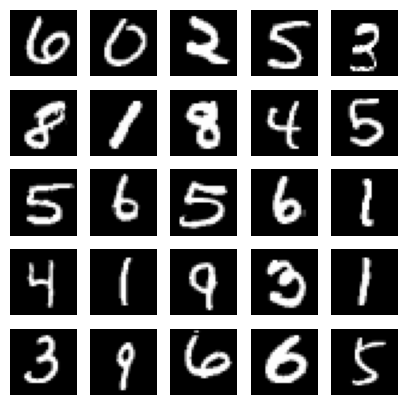

In [6]:
# Sample 25 MNIST digits from the training data and view the images
indices = np.random.randint(0, X_train.shape[0], size = 25)

images = X_train[indices]
labels = y_train[indices]

plt.figure(figsize = (5, 5))

for i in range(len(indices)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap = 'gray')
    plt.axis('off')

plt.show()
plt.close('all')

In [7]:
# Convert the pixel gray level values from the range [0, 255] to the range [0,1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [8]:
# Convert the class labels to one-hot encoded vectors using the 'to_categorical()' function
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

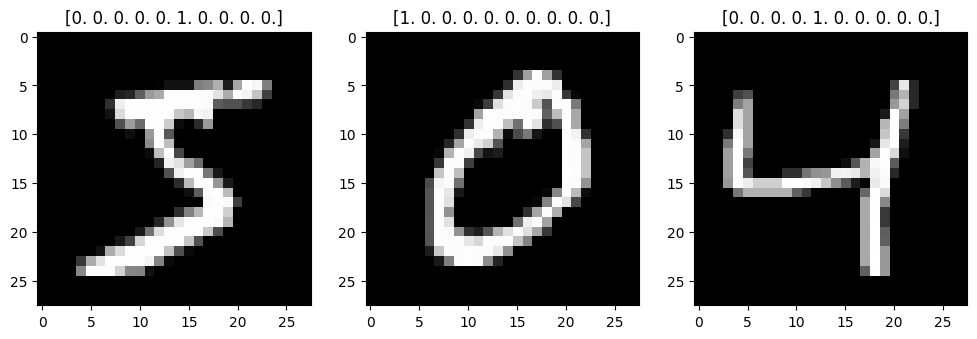

In [9]:
# View the first few training data images and their corresponding labels
plt.figure(figsize = (12, 12))

for data_index in np.arange(0, 3, 1):
    plt.subplot(1, 3, data_index + 1)
    plt.imshow(X_train[data_index], cmap = 'gray')
    plt.title(str(y_train[data_index]))

plt.show()
plt.tight_layout()
plt.close('all')

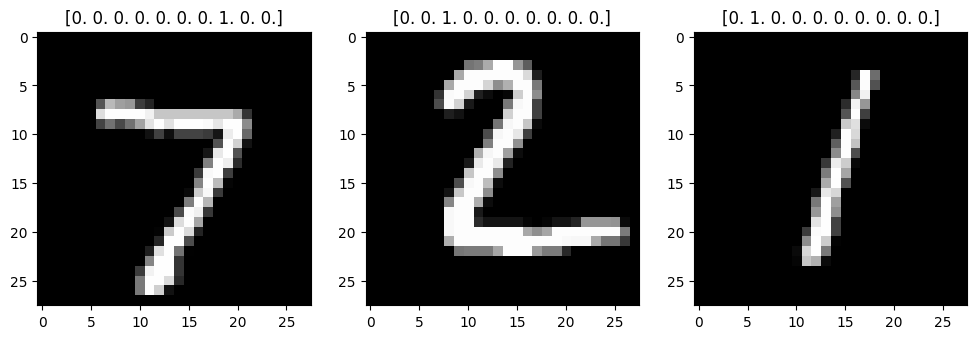

In [10]:
# View the first few testing data images and their corresponding labels
plt.figure(figsize = (12, 12))

for data_index in np.arange(0, 3, 1):
    plt.subplot(1, 3, data_index + 1)
    plt.imshow(X_test[data_index], cmap = 'gray')
    plt.title(str(y_test[data_index]))

plt.show()
plt.tight_layout()
plt.close('all')

In [12]:
# Flatten the images by converting them into a list of values
image_vector_size = 28 * 28

X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

# Part 3 - Artificial Neural Networks in Keras
In this section, we will:
- Build a simple neural network using *keras* and understand each of the commands
- Compile the network to prepare it for training
- View a summary of the model prior to training to check the number of trainable parameters
- Train the model on the training data
- Check its performance on the testing data

In [13]:
# Declare an instance of a neural network model using the 'Sequential()' method
nn1 = Sequential()

Using the above code, an instance of a neural network model has been created.

In [14]:
# Add one hidden layer to the model using the 'add()' and the 'Dense()' methods
nn1.add(Dense(units = 2,
              input_shape = (image_vector_size, ),
              activation = 'sigmoid'))

In the above code:
- *units* refers to the number of neurons in the layer
  - We will use 2 neurons per hidden layer by default for this demonstration
- *input_shape* refers to the number of input features in the input data
- *activation* refers to the type of activation function for the neurons in the layer

In [15]:
# Add the output layer to the model using the 'add()' and the 'Dense()' methods
nn1.add(Dense(units = num_classes,
              activation = 'softmax'))

In the above code:
- *units* refers to the number of neurons in the output layer
  - There are 10 unique class labels in this case
- *activation* refers to the type of activation function for the neurons in the layer
  - Since this is a multi-class classification exercise, *softmax* is a suitable activation function for the output layer neurons

In [16]:
# Compile the model to prepare it for training using the 'compile()' method
nn1.compile(loss = 'categorical_crossentropy',
            metrics = 'accuracy')

In the above code:
- *loss* refers to the type of loss function to be used for optimization
  - Since this is a multi-class classification exercise, *categorical_crossentropy* is a suitable loss function
- *metrics* refers to the list of metrics to be recorded as the network is trained

In [17]:
# Look at the summary of the structure of the network using the 'summary()' method
nn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


We can view the overall structure of the network using the above code.

In [20]:
# Train the model using the 'fit()' method
# Note: The 'batch_size' parameter defaults to 32 if not specified
nn1.fit(X_train, y_train, batch_size = X_train.shape[0], validation_split = 0.2)

1/1 [==============================] - 0s 355ms/step - loss: 2.2951 - accuracy: 0.1030 - val_loss: 2.2873 - val_accuracy: 0.1142


We can see in the above code that the neural network has trained on the complete training data set exactly once. In other words, the network has trained:
- For 1 epoch
- On the complete training data as a single batch (since the *batch_size* parameter was set to the size of the training data)

Also note that 20% of the training data was set aside as the validation set.

We can also see that the model isn't performing particularly well.

In [21]:
# Compute the accuracy of the model on the testing data set
performance_test = nn1.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

313/313 [==============================] - 1s 2ms/step - loss: 2.2866 - accuracy: 0.1166
The loss value of the model on the test data is 2.286619186401367
The accuracy of the model on the test data is 0.11659999936819077


# Part 4 - Epochs
In this section, we will:
- Build another basic neural network and train it on the training data for more than 1 epoch
- Check its peformance

In [22]:
# Create another neural network and train it on the training data set for 500 epochs
nn2 = Sequential()

nn2.add(Dense(units = 2,
              input_shape = (image_vector_size, ),
              activation = 'sigmoid'))

nn2.add(Dense(units = num_classes,
              activation = 'softmax'))

nn2.compile(loss = 'categorical_crossentropy',
            metrics = 'accuracy')

nn2.summary()
print('\n')
nn2.fit(X_train, y_train, batch_size = X_train.shape[0], validation_split = 0.2, epochs = 500)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 1570      
                                                                 
 dense_3 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 2.3527 - accuracy: 0.1068 - val_loss: 2.3384 - val_accuracy: 0.1105
Epoch 2/500
1/1 [==============================] - 0s 281ms/step - loss: 2.3353 - accuracy: 0.1106 - val_loss: 2.3272 - val_accuracy: 0.1142
Epoch 3/500
1/1 [==============================] - 0s 228ms/step - loss: 2.3245 - accuracy: 0.1144 - val_loss: 2.3190 - val_accuracy: 0.1192
Epoch 4/500
1/1 [=========

1/1 [==============================] - 0s 116ms/step - loss: 2.0373 - accuracy: 0.3433 - val_loss: 2.0293 - val_accuracy: 0.3499
Epoch 226/500
1/1 [==============================] - 0s 116ms/step - loss: 2.0365 - accuracy: 0.3435 - val_loss: 2.0285 - val_accuracy: 0.3493
Epoch 227/500
1/1 [==============================] - 0s 116ms/step - loss: 2.0358 - accuracy: 0.3434 - val_loss: 2.0278 - val_accuracy: 0.3504
Epoch 228/500
1/1 [==============================] - 0s 100ms/step - loss: 2.0351 - accuracy: 0.3438 - val_loss: 2.0271 - val_accuracy: 0.3495
Epoch 229/500
1/1 [==============================] - 0s 116ms/step - loss: 2.0344 - accuracy: 0.3439 - val_loss: 2.0264 - val_accuracy: 0.3507
Epoch 230/500
1/1 [==============================] - 0s 116ms/step - loss: 2.0337 - accuracy: 0.3441 - val_loss: 2.0257 - val_accuracy: 0.3498
Epoch 231/500
1/1 [==============================] - 0s 116ms/step - loss: 2.0330 - accuracy: 0.3443 - val_loss: 2.0250 - val_accuracy: 0.3506
Epoch 232/500

1/1 [==============================] - 0s 116ms/step - loss: 1.9983 - accuracy: 0.3455 - val_loss: 1.9902 - val_accuracy: 0.3529
Epoch 283/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9976 - accuracy: 0.3453 - val_loss: 1.9895 - val_accuracy: 0.3532
Epoch 284/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9970 - accuracy: 0.3453 - val_loss: 1.9889 - val_accuracy: 0.3524
Epoch 285/500
1/1 [==============================] - 0s 122ms/step - loss: 1.9963 - accuracy: 0.3451 - val_loss: 1.9882 - val_accuracy: 0.3532
Epoch 286/500
1/1 [==============================] - 0s 100ms/step - loss: 1.9957 - accuracy: 0.3452 - val_loss: 1.9876 - val_accuracy: 0.3530
Epoch 287/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9950 - accuracy: 0.3452 - val_loss: 1.9869 - val_accuracy: 0.3532
Epoch 288/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9944 - accuracy: 0.3451 - val_loss: 1.9863 - val_accuracy: 0.3532
Epoch 289/500

1/1 [==============================] - 0s 132ms/step - loss: 1.9623 - accuracy: 0.3419 - val_loss: 1.9544 - val_accuracy: 0.3536
Epoch 340/500
1/1 [==============================] - 0s 132ms/step - loss: 1.9617 - accuracy: 0.3417 - val_loss: 1.9538 - val_accuracy: 0.3540
Epoch 341/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9611 - accuracy: 0.3417 - val_loss: 1.9532 - val_accuracy: 0.3538
Epoch 342/500
1/1 [==============================] - 0s 138ms/step - loss: 1.9605 - accuracy: 0.3414 - val_loss: 1.9526 - val_accuracy: 0.3543
Epoch 343/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9599 - accuracy: 0.3413 - val_loss: 1.9520 - val_accuracy: 0.3533
Epoch 344/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9593 - accuracy: 0.3416 - val_loss: 1.9514 - val_accuracy: 0.3533
Epoch 345/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9587 - accuracy: 0.3413 - val_loss: 1.9508 - val_accuracy: 0.3532
Epoch 346/500

1/1 [==============================] - 0s 107ms/step - loss: 1.9288 - accuracy: 0.3389 - val_loss: 1.9211 - val_accuracy: 0.3519
Epoch 397/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9282 - accuracy: 0.3389 - val_loss: 1.9205 - val_accuracy: 0.3518
Epoch 398/500
1/1 [==============================] - 0s 100ms/step - loss: 1.9277 - accuracy: 0.3389 - val_loss: 1.9200 - val_accuracy: 0.3518
Epoch 399/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9271 - accuracy: 0.3390 - val_loss: 1.9194 - val_accuracy: 0.3517
Epoch 400/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9265 - accuracy: 0.3388 - val_loss: 1.9188 - val_accuracy: 0.3516
Epoch 401/500
1/1 [==============================] - 0s 100ms/step - loss: 1.9260 - accuracy: 0.3391 - val_loss: 1.9183 - val_accuracy: 0.3518
Epoch 402/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9254 - accuracy: 0.3389 - val_loss: 1.9177 - val_accuracy: 0.3514
Epoch 403/500

1/1 [==============================] - 0s 138ms/step - loss: 1.8972 - accuracy: 0.3385 - val_loss: 1.8897 - val_accuracy: 0.3497
Epoch 454/500
1/1 [==============================] - 0s 116ms/step - loss: 1.8967 - accuracy: 0.3379 - val_loss: 1.8892 - val_accuracy: 0.3495
Epoch 455/500
1/1 [==============================] - 0s 116ms/step - loss: 1.8961 - accuracy: 0.3385 - val_loss: 1.8887 - val_accuracy: 0.3492
Epoch 456/500
1/1 [==============================] - 0s 116ms/step - loss: 1.8956 - accuracy: 0.3378 - val_loss: 1.8881 - val_accuracy: 0.3497
Epoch 457/500
1/1 [==============================] - 0s 116ms/step - loss: 1.8951 - accuracy: 0.3384 - val_loss: 1.8876 - val_accuracy: 0.3493
Epoch 458/500
1/1 [==============================] - 0s 100ms/step - loss: 1.8945 - accuracy: 0.3376 - val_loss: 1.8870 - val_accuracy: 0.3498
Epoch 459/500
1/1 [==============================] - 0s 116ms/step - loss: 1.8940 - accuracy: 0.3384 - val_loss: 1.8865 - val_accuracy: 0.3494
Epoch 460/500

We can see in the above code that the neural network iteratively trains on the training data set 500 times (for 500 epochs), and the model's performance steadily increases over epochs.

In [23]:
# Retrain the model and this time, save its training history
nn2 = Sequential()

nn2.add(Dense(units = 2,
              input_shape = (image_vector_size, ),
              activation = 'sigmoid'))

nn2.add(Dense(units = num_classes,
              activation = 'softmax'))

nn2.compile(loss = 'categorical_crossentropy',
            metrics = 'accuracy')

# Capture the training history of the model
nn2.summary()
print('\n')
nn2_history = nn2.fit(X_train, y_train, batch_size = X_train.shape[0], validation_split = 0.2, epochs = 500)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 1570      
                                                                 
 dense_5 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 2.3135 - accuracy: 0.0959 - val_loss: 2.3020 - val_accuracy: 0.1147
Epoch 2/500
1/1 [==============================] - 0s 137ms/step - loss: 2.3014 - accuracy: 0.1098 - val_loss: 2.2933 - val_accuracy: 0.1226
Epoch 3/500
1/1 [==============================] - 0s 161ms/step - loss: 2.2930 - accuracy: 0.1174 - val_loss: 2.2862 - val_accuracy: 0.1259
Epoch 4/500
1/1 [=========

1/1 [==============================] - 0s 116ms/step - loss: 2.1231 - accuracy: 0.1715 - val_loss: 2.1225 - val_accuracy: 0.1730
Epoch 112/500
1/1 [==============================] - 0s 116ms/step - loss: 2.1221 - accuracy: 0.1741 - val_loss: 2.1214 - val_accuracy: 0.1762
Epoch 113/500
1/1 [==============================] - 0s 100ms/step - loss: 2.1210 - accuracy: 0.1768 - val_loss: 2.1204 - val_accuracy: 0.1792
Epoch 114/500
1/1 [==============================] - 0s 122ms/step - loss: 2.1200 - accuracy: 0.1792 - val_loss: 2.1194 - val_accuracy: 0.1805
Epoch 115/500
1/1 [==============================] - 0s 100ms/step - loss: 2.1190 - accuracy: 0.1818 - val_loss: 2.1183 - val_accuracy: 0.1837
Epoch 116/500
1/1 [==============================] - 0s 100ms/step - loss: 2.1179 - accuracy: 0.1844 - val_loss: 2.1173 - val_accuracy: 0.1865
Epoch 117/500
1/1 [==============================] - 0s 116ms/step - loss: 2.1169 - accuracy: 0.1869 - val_loss: 2.1163 - val_accuracy: 0.1887
Epoch 118/500

1/1 [==============================] - 0s 116ms/step - loss: 2.0694 - accuracy: 0.3097 - val_loss: 2.0684 - val_accuracy: 0.3064
Epoch 169/500
1/1 [==============================] - 0s 116ms/step - loss: 2.0686 - accuracy: 0.3113 - val_loss: 2.0676 - val_accuracy: 0.3077
Epoch 170/500
1/1 [==============================] - 0s 116ms/step - loss: 2.0677 - accuracy: 0.3122 - val_loss: 2.0667 - val_accuracy: 0.3098
Epoch 171/500
1/1 [==============================] - 0s 100ms/step - loss: 2.0668 - accuracy: 0.3139 - val_loss: 2.0658 - val_accuracy: 0.3108
Epoch 172/500
1/1 [==============================] - 0s 116ms/step - loss: 2.0660 - accuracy: 0.3148 - val_loss: 2.0650 - val_accuracy: 0.3128
Epoch 173/500
1/1 [==============================] - 0s 116ms/step - loss: 2.0651 - accuracy: 0.3164 - val_loss: 2.0641 - val_accuracy: 0.3134
Epoch 174/500
1/1 [==============================] - 0s 107ms/step - loss: 2.0643 - accuracy: 0.3168 - val_loss: 2.0633 - val_accuracy: 0.3148
Epoch 175/500

1/1 [==============================] - 0s 116ms/step - loss: 2.0233 - accuracy: 0.3558 - val_loss: 2.0219 - val_accuracy: 0.3482
Epoch 226/500
1/1 [==============================] - 0s 100ms/step - loss: 2.0225 - accuracy: 0.3555 - val_loss: 2.0212 - val_accuracy: 0.3504
Epoch 227/500
1/1 [==============================] - 0s 100ms/step - loss: 2.0218 - accuracy: 0.3561 - val_loss: 2.0204 - val_accuracy: 0.3492
Epoch 228/500
1/1 [==============================] - 0s 116ms/step - loss: 2.0210 - accuracy: 0.3563 - val_loss: 2.0196 - val_accuracy: 0.3504
Epoch 229/500
1/1 [==============================] - 0s 116ms/step - loss: 2.0202 - accuracy: 0.3568 - val_loss: 2.0188 - val_accuracy: 0.3509
Epoch 230/500
1/1 [==============================] - 0s 116ms/step - loss: 2.0195 - accuracy: 0.3571 - val_loss: 2.0181 - val_accuracy: 0.3510
Epoch 231/500
1/1 [==============================] - 0s 116ms/step - loss: 2.0187 - accuracy: 0.3576 - val_loss: 2.0173 - val_accuracy: 0.3514
Epoch 232/500

1/1 [==============================] - 0s 116ms/step - loss: 1.9811 - accuracy: 0.3739 - val_loss: 1.9795 - val_accuracy: 0.3674
Epoch 283/500
1/1 [==============================] - 0s 100ms/step - loss: 1.9804 - accuracy: 0.3746 - val_loss: 1.9787 - val_accuracy: 0.3678
Epoch 284/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9797 - accuracy: 0.3744 - val_loss: 1.9781 - val_accuracy: 0.3686
Epoch 285/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9790 - accuracy: 0.3750 - val_loss: 1.9773 - val_accuracy: 0.3688
Epoch 286/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9783 - accuracy: 0.3749 - val_loss: 1.9766 - val_accuracy: 0.3692
Epoch 287/500
1/1 [==============================] - 0s 100ms/step - loss: 1.9775 - accuracy: 0.3754 - val_loss: 1.9759 - val_accuracy: 0.3703
Epoch 288/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9768 - accuracy: 0.3753 - val_loss: 1.9752 - val_accuracy: 0.3696
Epoch 289/500

1/1 [==============================] - 0s 100ms/step - loss: 1.9415 - accuracy: 0.3915 - val_loss: 1.9396 - val_accuracy: 0.3866
Epoch 340/500
1/1 [==============================] - 0s 100ms/step - loss: 1.9408 - accuracy: 0.3909 - val_loss: 1.9389 - val_accuracy: 0.3871
Epoch 341/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9402 - accuracy: 0.3914 - val_loss: 1.9382 - val_accuracy: 0.3865
Epoch 342/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9395 - accuracy: 0.3904 - val_loss: 1.9376 - val_accuracy: 0.3868
Epoch 343/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9388 - accuracy: 0.3913 - val_loss: 1.9369 - val_accuracy: 0.3860
Epoch 344/500
1/1 [==============================] - 0s 107ms/step - loss: 1.9381 - accuracy: 0.3900 - val_loss: 1.9362 - val_accuracy: 0.3869
Epoch 345/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9375 - accuracy: 0.3907 - val_loss: 1.9355 - val_accuracy: 0.3860
Epoch 346/500

1/1 [==============================] - 0s 100ms/step - loss: 1.9040 - accuracy: 0.3836 - val_loss: 1.9019 - val_accuracy: 0.3821
Epoch 397/500
1/1 [==============================] - 0s 122ms/step - loss: 1.9034 - accuracy: 0.3841 - val_loss: 1.9013 - val_accuracy: 0.3817
Epoch 398/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9028 - accuracy: 0.3833 - val_loss: 1.9006 - val_accuracy: 0.3815
Epoch 399/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9021 - accuracy: 0.3839 - val_loss: 1.9000 - val_accuracy: 0.3817
Epoch 400/500
1/1 [==============================] - 0s 100ms/step - loss: 1.9015 - accuracy: 0.3830 - val_loss: 1.8994 - val_accuracy: 0.3811
Epoch 401/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9008 - accuracy: 0.3836 - val_loss: 1.8987 - val_accuracy: 0.3816
Epoch 402/500
1/1 [==============================] - 0s 116ms/step - loss: 1.9002 - accuracy: 0.3829 - val_loss: 1.8981 - val_accuracy: 0.3812
Epoch 403/500

1/1 [==============================] - 0s 116ms/step - loss: 1.8685 - accuracy: 0.3795 - val_loss: 1.8662 - val_accuracy: 0.3766
Epoch 454/500
1/1 [==============================] - 0s 116ms/step - loss: 1.8679 - accuracy: 0.3796 - val_loss: 1.8656 - val_accuracy: 0.3767
Epoch 455/500
1/1 [==============================] - 0s 100ms/step - loss: 1.8673 - accuracy: 0.3795 - val_loss: 1.8650 - val_accuracy: 0.3762
Epoch 456/500
1/1 [==============================] - 0s 116ms/step - loss: 1.8666 - accuracy: 0.3794 - val_loss: 1.8644 - val_accuracy: 0.3767
Epoch 457/500
1/1 [==============================] - 0s 116ms/step - loss: 1.8660 - accuracy: 0.3794 - val_loss: 1.8637 - val_accuracy: 0.3764
Epoch 458/500
1/1 [==============================] - 0s 116ms/step - loss: 1.8654 - accuracy: 0.3792 - val_loss: 1.8632 - val_accuracy: 0.3767
Epoch 459/500
1/1 [==============================] - 0s 100ms/step - loss: 1.8648 - accuracy: 0.3792 - val_loss: 1.8625 - val_accuracy: 0.3765
Epoch 460/500

In [24]:
# Convert the neural network history object into a data frame to view its specifics
hist = pd.DataFrame(nn2_history.history)
hist['epoch'] = nn2_history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

,loss,accuracy,val_loss,val_accuracy
epoch,,,,
1,2.313468,0.095917,2.302036,0.114750
2,2.301442,0.109771,2.293315,0.122583
3,2.292967,0.117437,2.286198,0.125917
4,2.286054,0.122229,2.280025,0.128667
5,2.280058,0.125292,2.274487,0.130917
...,...,...,...,...
496,1.894931,0.298229,1.886453,0.298583
497,1.894536,0.298438,1.886052,0.298750
498,1.894142,0.298625,1.885651,0.298750


As we can see in the above data frame, the training history of the neural network has been recorded and stored in the form of a data frame, in which we can see both the training and validation performance metrics for each epoch.

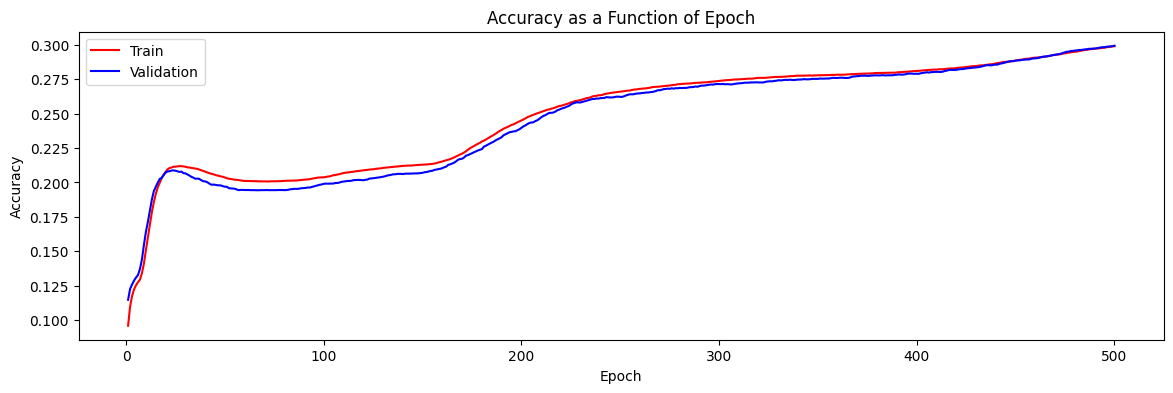

In [25]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Train')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

Note that the performance of the model improves steadily over epochs, although the rate of increase in accuracy over epochs is quite slow. This is because the model is training on the complete training data as single batch. The number of loss computations and subsequent gradient descent convergences is less (1) per epoch, so each epoch trains faster, but it requires many more epochs to train optimally.

In general, there is a trade-off between batch size and number of epochs required to train the model effectively. In common practice, neural networks are usually trained in batches (which requires less epochs to optimally train the model), and which generally leads to better model performance.

For this demonstration however, we will set the *batch_size* parameter as equal to the size of the training data (which requires more epochs to train effectively). Also, for the rest of this exercise, we will set the *epochs* parameter to 200 for the purpose of demonstration.

In [26]:
# Compute the accuracy of the model on the testing data set
performance_test = nn2.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

313/313 [==============================] - 1s 2ms/step - loss: 1.8917 - accuracy: 0.3086
The loss value of the model on the test data is 1.891749382019043
The accuracy of the model on the test data is 0.3086000084877014


# Part 5 - Hyperparameter Tuning: Number of Neurons in a Hidden Layer
In this section, we will:
- Create a basic neural network model for the data and tune it for the number of neurons in a hidden layer
  - Note: The number of hidden layers is fixed at 1
- Check the performance of the model for different values of number of neurons

In [27]:
# Declare a range of number of neurons per hidden layer to tune for
n_neurons_list = [2, 4, 8, 16]

# Create and train a neural network model for each value of number of neurons per hidden layer
performance_df = pd.DataFrame(data = None)
hist = [None] * 4
indexcount = -1

for n_neu in n_neurons_list:
    indexcount = indexcount + 1
    
    nn = Sequential()
    
    nn.add(Dense(units = n_neu,
                 input_shape = (image_vector_size, ),
                 activation = 'sigmoid'))
    
    nn.add(Dense(units = num_classes,
                 activation = 'softmax'))
    
    nn.compile(loss = 'categorical_crossentropy',
               metrics = 'accuracy')
    
    print('\n Training and validation for {} neurons - START \n'.format(n_neu))
    nn.summary()
    print('\n')
    nn_history = nn.fit(X_train, y_train, batch_size = X_train.shape[0], validation_split = 0.2, epochs = 200)
    print('\n Training and validation for {} neurons - END \n'.format(n_neu))
    
    hist[indexcount] = pd.DataFrame(nn_history.history)
    hist[indexcount]['epoch'] = nn_history.epoch
    
    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Number of Neurons': n_neu,
                                  'Train Accuracy': hist[indexcount]['accuracy'][199],
                                  'Validation Accuracy': hist[indexcount]['val_accuracy'][199]})
    
    performance_df = pd.concat([performance_df, tempdf])


 Training and validation for 2 neurons - START 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 1570      
                                                                 
 dense_7 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 2.3117 - accuracy: 0.1128 - val_loss: 2.3040 - val_accuracy: 0.1223
Epoch 2/200
1/1 [==============================] - 0s 196ms/step - loss: 2.3027 - accuracy: 0.1145 - val_loss: 2.2974 - val_accuracy: 0.1224
Epoch 3/200
1/1 [==============================] - 0s 212ms/step - loss: 2.2965 - accuracy: 0.1145 - val_loss: 2.2921

Epoch 111/200
1/1 [==============================] - 0s 116ms/step - loss: 2.1679 - accuracy: 0.1870 - val_loss: 2.1626 - val_accuracy: 0.1981
Epoch 112/200
1/1 [==============================] - 0s 100ms/step - loss: 2.1670 - accuracy: 0.1879 - val_loss: 2.1617 - val_accuracy: 0.1982
Epoch 113/200
1/1 [==============================] - 0s 116ms/step - loss: 2.1661 - accuracy: 0.1889 - val_loss: 2.1608 - val_accuracy: 0.1988
Epoch 114/200
1/1 [==============================] - 0s 116ms/step - loss: 2.1652 - accuracy: 0.1897 - val_loss: 2.1599 - val_accuracy: 0.1998
Epoch 115/200
1/1 [==============================] - 0s 100ms/step - loss: 2.1643 - accuracy: 0.1906 - val_loss: 2.1590 - val_accuracy: 0.2002
Epoch 116/200
1/1 [==============================] - 0s 100ms/step - loss: 2.1634 - accuracy: 0.1911 - val_loss: 2.1581 - val_accuracy: 0.2020
Epoch 117/200
1/1 [==============================] - 0s 116ms/step - loss: 2.1625 - accuracy: 0.1921 - val_loss: 2.1572 - val_accuracy: 0.2027

1/1 [==============================] - 0s 100ms/step - loss: 2.1203 - accuracy: 0.2238 - val_loss: 2.1149 - val_accuracy: 0.2340
Epoch 169/200
1/1 [==============================] - 0s 100ms/step - loss: 2.1195 - accuracy: 0.2239 - val_loss: 2.1141 - val_accuracy: 0.2364
Epoch 170/200
1/1 [==============================] - 0s 116ms/step - loss: 2.1187 - accuracy: 0.2260 - val_loss: 2.1133 - val_accuracy: 0.2362
Epoch 171/200
1/1 [==============================] - 0s 116ms/step - loss: 2.1179 - accuracy: 0.2257 - val_loss: 2.1125 - val_accuracy: 0.2381
Epoch 172/200
1/1 [==============================] - 0s 116ms/step - loss: 2.1171 - accuracy: 0.2280 - val_loss: 2.1118 - val_accuracy: 0.2377
Epoch 173/200
1/1 [==============================] - 0s 107ms/step - loss: 2.1164 - accuracy: 0.2280 - val_loss: 2.1110 - val_accuracy: 0.2402
Epoch 174/200
1/1 [==============================] - 0s 116ms/step - loss: 2.1156 - accuracy: 0.2298 - val_loss: 2.1102 - val_accuracy: 0.2410
Epoch 175/200

1/1 [==============================] - 0s 107ms/step - loss: 2.2230 - accuracy: 0.1056 - val_loss: 2.2149 - val_accuracy: 0.1063
Epoch 21/200
1/1 [==============================] - 0s 116ms/step - loss: 2.2185 - accuracy: 0.1067 - val_loss: 2.2104 - val_accuracy: 0.1070
Epoch 22/200
1/1 [==============================] - 0s 116ms/step - loss: 2.2142 - accuracy: 0.1079 - val_loss: 2.2060 - val_accuracy: 0.1085
Epoch 23/200
1/1 [==============================] - 0s 116ms/step - loss: 2.2099 - accuracy: 0.1091 - val_loss: 2.2017 - val_accuracy: 0.1098
Epoch 24/200
1/1 [==============================] - 0s 116ms/step - loss: 2.2056 - accuracy: 0.1104 - val_loss: 2.1974 - val_accuracy: 0.1116
Epoch 25/200
1/1 [==============================] - 0s 100ms/step - loss: 2.2015 - accuracy: 0.1120 - val_loss: 2.1932 - val_accuracy: 0.1137
Epoch 26/200
1/1 [==============================] - 0s 116ms/step - loss: 2.1974 - accuracy: 0.1140 - val_loss: 2.1890 - val_accuracy: 0.1156
Epoch 27/200
1/1 [=

Epoch 78/200
1/1 [==============================] - 0s 154ms/step - loss: 2.0372 - accuracy: 0.2267 - val_loss: 2.0270 - val_accuracy: 0.2393
Epoch 79/200
1/1 [==============================] - 0s 131ms/step - loss: 2.0349 - accuracy: 0.2282 - val_loss: 2.0246 - val_accuracy: 0.2402
Epoch 80/200
1/1 [==============================] - 0s 147ms/step - loss: 2.0325 - accuracy: 0.2297 - val_loss: 2.0222 - val_accuracy: 0.2413
Epoch 81/200
1/1 [==============================] - 0s 138ms/step - loss: 2.0302 - accuracy: 0.2311 - val_loss: 2.0199 - val_accuracy: 0.2426
Epoch 82/200
1/1 [==============================] - 0s 131ms/step - loss: 2.0279 - accuracy: 0.2326 - val_loss: 2.0176 - val_accuracy: 0.2438
Epoch 83/200
1/1 [==============================] - 0s 121ms/step - loss: 2.0256 - accuracy: 0.2340 - val_loss: 2.0153 - val_accuracy: 0.2457
Epoch 84/200
1/1 [==============================] - 0s 117ms/step - loss: 2.0233 - accuracy: 0.2352 - val_loss: 2.0130 - val_accuracy: 0.2467
Epoch 

1/1 [==============================] - 0s 100ms/step - loss: 1.9261 - accuracy: 0.4394 - val_loss: 1.9159 - val_accuracy: 0.4415
Epoch 136/200
1/1 [==============================] - 0s 116ms/step - loss: 1.9245 - accuracy: 0.4418 - val_loss: 1.9143 - val_accuracy: 0.4436
Epoch 137/200
1/1 [==============================] - 0s 122ms/step - loss: 1.9229 - accuracy: 0.4432 - val_loss: 1.9127 - val_accuracy: 0.4456
Epoch 138/200
1/1 [==============================] - 0s 103ms/step - loss: 1.9213 - accuracy: 0.4452 - val_loss: 1.9111 - val_accuracy: 0.4481
Epoch 139/200
1/1 [==============================] - 0s 116ms/step - loss: 1.9197 - accuracy: 0.4467 - val_loss: 1.9095 - val_accuracy: 0.4494
Epoch 140/200
1/1 [==============================] - 0s 128ms/step - loss: 1.9181 - accuracy: 0.4483 - val_loss: 1.9079 - val_accuracy: 0.4501
Epoch 141/200
1/1 [==============================] - 0s 116ms/step - loss: 1.9165 - accuracy: 0.4498 - val_loss: 1.9063 - val_accuracy: 0.4524
Epoch 142/200

1/1 [==============================] - 0s 116ms/step - loss: 1.8438 - accuracy: 0.4951 - val_loss: 1.8342 - val_accuracy: 0.5011
Epoch 193/200
1/1 [==============================] - 0s 100ms/step - loss: 1.8425 - accuracy: 0.4965 - val_loss: 1.8328 - val_accuracy: 0.5013
Epoch 194/200
1/1 [==============================] - 0s 85ms/step - loss: 1.8412 - accuracy: 0.4965 - val_loss: 1.8315 - val_accuracy: 0.5021
Epoch 195/200
1/1 [==============================] - 0s 94ms/step - loss: 1.8398 - accuracy: 0.4976 - val_loss: 1.8302 - val_accuracy: 0.5027
Epoch 196/200
1/1 [==============================] - 0s 85ms/step - loss: 1.8385 - accuracy: 0.4979 - val_loss: 1.8289 - val_accuracy: 0.5040
Epoch 197/200
1/1 [==============================] - 0s 85ms/step - loss: 1.8372 - accuracy: 0.4993 - val_loss: 1.8276 - val_accuracy: 0.5042
Epoch 198/200
1/1 [==============================] - 0s 100ms/step - loss: 1.8359 - accuracy: 0.4990 - val_loss: 1.8263 - val_accuracy: 0.5051
Epoch 199/200
1/1

1/1 [==============================] - 0s 116ms/step - loss: 1.8989 - accuracy: 0.5919 - val_loss: 1.8892 - val_accuracy: 0.6049
Epoch 45/200
1/1 [==============================] - 0s 122ms/step - loss: 1.8933 - accuracy: 0.5952 - val_loss: 1.8835 - val_accuracy: 0.6085
Epoch 46/200
1/1 [==============================] - 0s 116ms/step - loss: 1.8877 - accuracy: 0.5975 - val_loss: 1.8779 - val_accuracy: 0.6113
Epoch 47/200
1/1 [==============================] - 0s 132ms/step - loss: 1.8822 - accuracy: 0.6005 - val_loss: 1.8723 - val_accuracy: 0.6139
Epoch 48/200
1/1 [==============================] - 0s 100ms/step - loss: 1.8767 - accuracy: 0.6031 - val_loss: 1.8668 - val_accuracy: 0.6174
Epoch 49/200
1/1 [==============================] - 0s 116ms/step - loss: 1.8713 - accuracy: 0.6062 - val_loss: 1.8613 - val_accuracy: 0.6204
Epoch 50/200
1/1 [==============================] - 0s 100ms/step - loss: 1.8660 - accuracy: 0.6086 - val_loss: 1.8559 - val_accuracy: 0.6239
Epoch 51/200
1/1 [=

Epoch 102/200
1/1 [==============================] - 0s 122ms/step - loss: 1.6399 - accuracy: 0.7101 - val_loss: 1.6263 - val_accuracy: 0.7294
Epoch 103/200
1/1 [==============================] - 0s 100ms/step - loss: 1.6362 - accuracy: 0.7115 - val_loss: 1.6226 - val_accuracy: 0.7311
Epoch 104/200
1/1 [==============================] - 0s 116ms/step - loss: 1.6326 - accuracy: 0.7128 - val_loss: 1.6190 - val_accuracy: 0.7324
Epoch 105/200
1/1 [==============================] - 0s 100ms/step - loss: 1.6291 - accuracy: 0.7142 - val_loss: 1.6153 - val_accuracy: 0.7334
Epoch 106/200
1/1 [==============================] - 0s 132ms/step - loss: 1.6255 - accuracy: 0.7154 - val_loss: 1.6117 - val_accuracy: 0.7350
Epoch 107/200
1/1 [==============================] - 0s 116ms/step - loss: 1.6220 - accuracy: 0.7166 - val_loss: 1.6081 - val_accuracy: 0.7359
Epoch 108/200
1/1 [==============================] - 0s 116ms/step - loss: 1.6185 - accuracy: 0.7182 - val_loss: 1.6046 - val_accuracy: 0.7378

1/1 [==============================] - 0s 116ms/step - loss: 1.4602 - accuracy: 0.7692 - val_loss: 1.4444 - val_accuracy: 0.7862
Epoch 160/200
1/1 [==============================] - 0s 100ms/step - loss: 1.4574 - accuracy: 0.7702 - val_loss: 1.4417 - val_accuracy: 0.7881
Epoch 161/200
1/1 [==============================] - 0s 100ms/step - loss: 1.4547 - accuracy: 0.7707 - val_loss: 1.4388 - val_accuracy: 0.7884
Epoch 162/200
1/1 [==============================] - 0s 100ms/step - loss: 1.4519 - accuracy: 0.7717 - val_loss: 1.4361 - val_accuracy: 0.7899
Epoch 163/200
1/1 [==============================] - 0s 116ms/step - loss: 1.4492 - accuracy: 0.7724 - val_loss: 1.4333 - val_accuracy: 0.7908
Epoch 164/200
1/1 [==============================] - 0s 116ms/step - loss: 1.4464 - accuracy: 0.7731 - val_loss: 1.4306 - val_accuracy: 0.7911
Epoch 165/200
1/1 [==============================] - 0s 100ms/step - loss: 1.4437 - accuracy: 0.7737 - val_loss: 1.4278 - val_accuracy: 0.7927
Epoch 166/200

1/1 [==============================] - 0s 116ms/step - loss: 2.1503 - accuracy: 0.3002 - val_loss: 2.1250 - val_accuracy: 0.3241
Epoch 12/200
1/1 [==============================] - 0s 131ms/step - loss: 2.1331 - accuracy: 0.3139 - val_loss: 2.1082 - val_accuracy: 0.3359
Epoch 13/200
1/1 [==============================] - 0s 116ms/step - loss: 2.1165 - accuracy: 0.3272 - val_loss: 2.0920 - val_accuracy: 0.3503
Epoch 14/200
1/1 [==============================] - 0s 138ms/step - loss: 2.1006 - accuracy: 0.3412 - val_loss: 2.0763 - val_accuracy: 0.3637
Epoch 15/200
1/1 [==============================] - 0s 132ms/step - loss: 2.0852 - accuracy: 0.3553 - val_loss: 2.0611 - val_accuracy: 0.3795
Epoch 16/200
1/1 [==============================] - 0s 100ms/step - loss: 2.0703 - accuracy: 0.3707 - val_loss: 2.0463 - val_accuracy: 0.3939
Epoch 17/200
1/1 [==============================] - 0s 116ms/step - loss: 2.0558 - accuracy: 0.3868 - val_loss: 2.0319 - val_accuracy: 0.4101
Epoch 18/200
1/1 [=

Epoch 69/200
1/1 [==============================] - 0s 116ms/step - loss: 1.5414 - accuracy: 0.7025 - val_loss: 1.5164 - val_accuracy: 0.7188
Epoch 70/200
1/1 [==============================] - 0s 116ms/step - loss: 1.5342 - accuracy: 0.7041 - val_loss: 1.5092 - val_accuracy: 0.7207
Epoch 71/200
1/1 [==============================] - 0s 116ms/step - loss: 1.5270 - accuracy: 0.7058 - val_loss: 1.5020 - val_accuracy: 0.7222
Epoch 72/200
1/1 [==============================] - 0s 138ms/step - loss: 1.5199 - accuracy: 0.7074 - val_loss: 1.4949 - val_accuracy: 0.7238
Epoch 73/200
1/1 [==============================] - 0s 116ms/step - loss: 1.5129 - accuracy: 0.7088 - val_loss: 1.4878 - val_accuracy: 0.7243
Epoch 74/200
1/1 [==============================] - 0s 131ms/step - loss: 1.5059 - accuracy: 0.7101 - val_loss: 1.4808 - val_accuracy: 0.7258
Epoch 75/200
1/1 [==============================] - 0s 132ms/step - loss: 1.4989 - accuracy: 0.7116 - val_loss: 1.4738 - val_accuracy: 0.7283
Epoch 

1/1 [==============================] - 0s 116ms/step - loss: 1.2052 - accuracy: 0.7804 - val_loss: 1.1794 - val_accuracy: 0.7940
Epoch 127/200
1/1 [==============================] - 0s 116ms/step - loss: 1.2004 - accuracy: 0.7819 - val_loss: 1.1746 - val_accuracy: 0.7962
Epoch 128/200
1/1 [==============================] - 0s 116ms/step - loss: 1.1956 - accuracy: 0.7835 - val_loss: 1.1698 - val_accuracy: 0.7978
Epoch 129/200
1/1 [==============================] - 0s 116ms/step - loss: 1.1908 - accuracy: 0.7845 - val_loss: 1.1650 - val_accuracy: 0.7997
Epoch 130/200
1/1 [==============================] - 0s 116ms/step - loss: 1.1861 - accuracy: 0.7860 - val_loss: 1.1603 - val_accuracy: 0.8005
Epoch 131/200
1/1 [==============================] - 0s 116ms/step - loss: 1.1814 - accuracy: 0.7871 - val_loss: 1.1555 - val_accuracy: 0.8033
Epoch 132/200
1/1 [==============================] - 0s 116ms/step - loss: 1.1767 - accuracy: 0.7894 - val_loss: 1.1509 - val_accuracy: 0.8037
Epoch 133/200

1/1 [==============================] - 0s 116ms/step - loss: 0.9710 - accuracy: 0.8419 - val_loss: 0.9453 - val_accuracy: 0.8593
Epoch 184/200
1/1 [==============================] - 0s 100ms/step - loss: 0.9675 - accuracy: 0.8442 - val_loss: 0.9420 - val_accuracy: 0.8594
Epoch 185/200
1/1 [==============================] - 0s 122ms/step - loss: 0.9641 - accuracy: 0.8436 - val_loss: 0.9384 - val_accuracy: 0.8604
Epoch 186/200
1/1 [==============================] - 0s 116ms/step - loss: 0.9606 - accuracy: 0.8456 - val_loss: 0.9351 - val_accuracy: 0.8606
Epoch 187/200
1/1 [==============================] - 0s 116ms/step - loss: 0.9572 - accuracy: 0.8449 - val_loss: 0.9316 - val_accuracy: 0.8613
Epoch 188/200
1/1 [==============================] - 0s 131ms/step - loss: 0.9538 - accuracy: 0.8469 - val_loss: 0.9283 - val_accuracy: 0.8611
Epoch 189/200
1/1 [==============================] - 0s 131ms/step - loss: 0.9505 - accuracy: 0.8466 - val_loss: 0.9248 - val_accuracy: 0.8616
Epoch 190/200

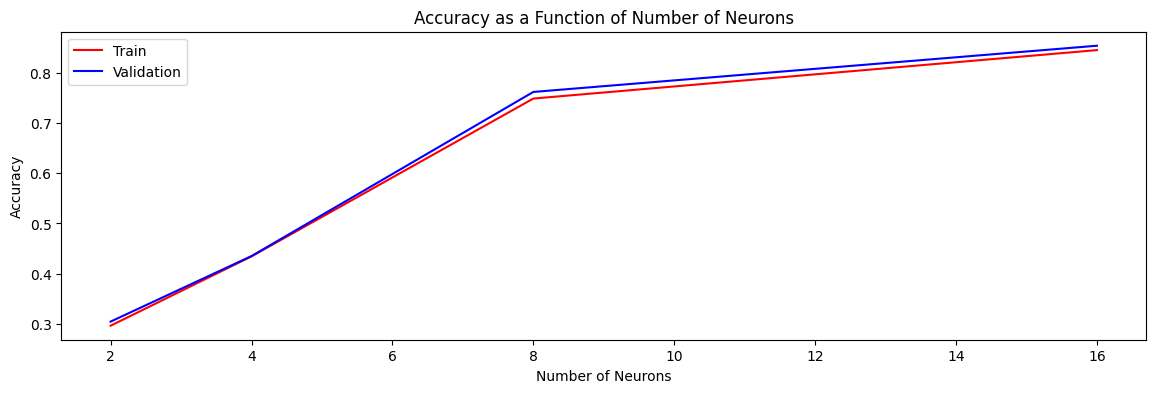

In [28]:
# View the training and validation accuracies as functions of number of neurons
plt.figure(figsize = (14, 4))

sns.lineplot(data = performance_df, x = 'Number of Neurons', y = 'Train Accuracy', color = 'red', label = 'Train')
sns.lineplot(data = performance_df, x = 'Number of Neurons', y = 'Validation Accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Number of Neurons');

As we can see in the above diagram, the accuracy of the model seems to improve with the number of neurons, keeping the number of hidden layers fixed at 1.

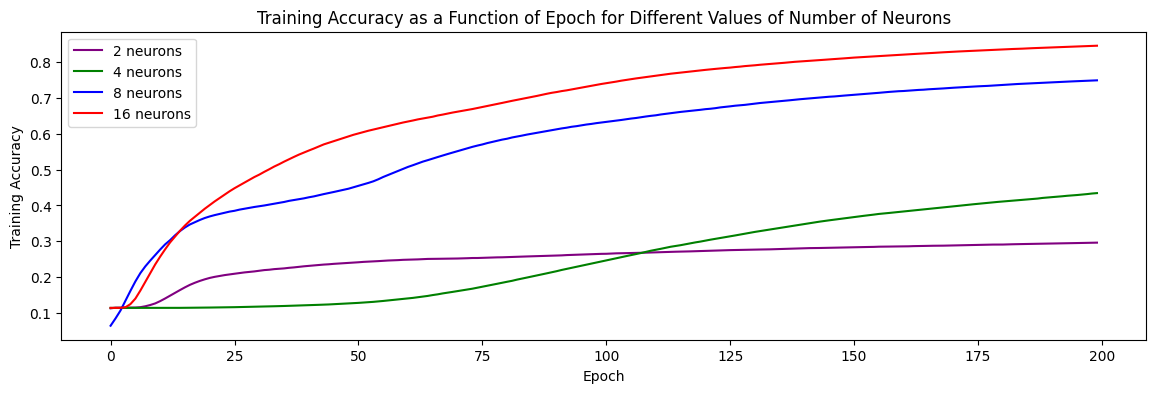

In [29]:
# View the training accuracies as functions of epochs for different values of number of neurons
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for n_neu in n_neurons_list:
    indexcount = indexcount + 1
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'accuracy',
                 color = colorlist[indexcount],
                 label = str(n_neu) + ' neurons')

plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy as a Function of Epoch for Different Values of Number of Neurons');

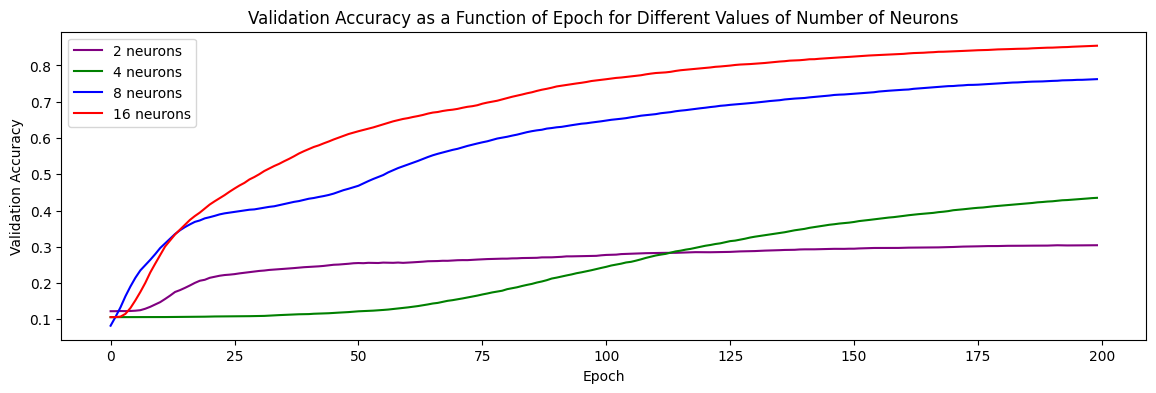

In [30]:
# View the validation accuracies as functions of epochs for different values of number of neurons
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for n_neu in n_neurons_list:
    indexcount = indexcount + 1
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'val_accuracy',
                 color = colorlist[indexcount],
                 label = str(n_neu) + ' neurons')

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy as a Function of Epoch for Different Values of Number of Neurons');

As we can see in the above diagrams, the rate at which the model's performance increases is generally greater for a larger number of neurons.

# Part 6 - Hyperparameter Tuning: Number of Hidden Layers
In this section, we will:
- Create a basic neural network model for the data and tune it for the number of hidden layers
  - Note: The number of neurons is fixed at 2
- Check the performance of the model for different values of number of hidden layers

In [31]:
# Declare a range of number of hidden layers to tune for
n_hidden_list = [1, 2, 3, 4]

# Create and train a neural network model for each value of number of hidden layers
performance_df = pd.DataFrame(data = None)
hist = [None] * 4
indexcount = -1

for n_hid in n_hidden_list:
    indexcount = indexcount + 1
    
    nn = Sequential()
    
    nn.add(Dense(units = 2,
                 input_shape = (image_vector_size, ),
                 activation = 'sigmoid'))
    
    for temp_n_hid in np.arange(1, n_hid, 1):
        nn.add(Dense(units = 2,
                     activation = 'sigmoid'))
    
    nn.add(Dense(units = num_classes,
                 activation = 'softmax'))
    
    nn.compile(loss = 'categorical_crossentropy',
               metrics = 'accuracy')
    
    print('\n Training and validation for {} hidden layers - START \n'.format(n_hid))
    nn.summary()
    print('\n')
    nn_history = nn.fit(X_train, y_train, batch_size = X_train.shape[0], validation_split = 0.2, epochs = 200)
    print('\n Training and validation for {} hidden layers - END \n'.format(n_hid))
    
    hist[indexcount] = pd.DataFrame(nn_history.history)
    hist[indexcount]['epoch'] = nn_history.epoch
    
    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Number of Hidden Layers': n_hid,
                                  'Train Accuracy': hist[indexcount]['accuracy'][199],
                                  'Validation Accuracy': hist[indexcount]['val_accuracy'][199]})
    
    performance_df = pd.concat([performance_df, tempdf])


 Training and validation for 1 hidden layers - START 

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 2)                 1570      
                                                                 
 dense_15 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2.3396 - accuracy: 0.0978 - val_loss: 2.3252 - val_accuracy: 0.0980
Epoch 2/200
1/1 [==============================] - 0s 222ms/step - loss: 2.3278 - accuracy: 0.0982 - val_loss: 2.3172 - val_accuracy: 0.1026
Epoch 3/200
1/1 [==============================] - 0s 242ms/step - loss: 2.3199 - accuracy: 0.1011 - val_loss: 

Epoch 111/200
1/1 [==============================] - 0s 100ms/step - loss: 2.1223 - accuracy: 0.1966 - val_loss: 2.1168 - val_accuracy: 0.2043
Epoch 112/200
1/1 [==============================] - 0s 116ms/step - loss: 2.1212 - accuracy: 0.1968 - val_loss: 2.1157 - val_accuracy: 0.2045
Epoch 113/200
1/1 [==============================] - 0s 116ms/step - loss: 2.1201 - accuracy: 0.1968 - val_loss: 2.1146 - val_accuracy: 0.2042
Epoch 114/200
1/1 [==============================] - 0s 116ms/step - loss: 2.1190 - accuracy: 0.1968 - val_loss: 2.1135 - val_accuracy: 0.2047
Epoch 115/200
1/1 [==============================] - 0s 116ms/step - loss: 2.1179 - accuracy: 0.1967 - val_loss: 2.1124 - val_accuracy: 0.2049
Epoch 116/200
1/1 [==============================] - 0s 116ms/step - loss: 2.1169 - accuracy: 0.1967 - val_loss: 2.1113 - val_accuracy: 0.2048
Epoch 117/200
1/1 [==============================] - 0s 122ms/step - loss: 2.1158 - accuracy: 0.1966 - val_loss: 2.1102 - val_accuracy: 0.2045

1/1 [==============================] - 0s 116ms/step - loss: 2.0668 - accuracy: 0.1839 - val_loss: 2.0612 - val_accuracy: 0.1871
Epoch 169/200
1/1 [==============================] - 0s 100ms/step - loss: 2.0659 - accuracy: 0.1836 - val_loss: 2.0604 - val_accuracy: 0.1866
Epoch 170/200
1/1 [==============================] - 0s 116ms/step - loss: 2.0651 - accuracy: 0.1832 - val_loss: 2.0595 - val_accuracy: 0.1858
Epoch 171/200
1/1 [==============================] - 0s 116ms/step - loss: 2.0642 - accuracy: 0.1833 - val_loss: 2.0587 - val_accuracy: 0.1853
Epoch 172/200
1/1 [==============================] - 0s 100ms/step - loss: 2.0634 - accuracy: 0.1830 - val_loss: 2.0578 - val_accuracy: 0.1852
Epoch 173/200
1/1 [==============================] - 0s 107ms/step - loss: 2.0625 - accuracy: 0.1832 - val_loss: 2.0569 - val_accuracy: 0.1849
Epoch 174/200
1/1 [==============================] - 0s 100ms/step - loss: 2.0617 - accuracy: 0.1828 - val_loss: 2.0561 - val_accuracy: 0.1848
Epoch 175/200

1/1 [==============================] - 0s 116ms/step - loss: 2.3364 - accuracy: 0.1018 - val_loss: 2.3330 - val_accuracy: 0.1035
Epoch 20/200
1/1 [==============================] - 0s 116ms/step - loss: 2.3355 - accuracy: 0.1019 - val_loss: 2.3321 - val_accuracy: 0.1035
Epoch 21/200
1/1 [==============================] - 0s 116ms/step - loss: 2.3345 - accuracy: 0.1019 - val_loss: 2.3311 - val_accuracy: 0.1035
Epoch 22/200
1/1 [==============================] - 0s 122ms/step - loss: 2.3336 - accuracy: 0.1019 - val_loss: 2.3302 - val_accuracy: 0.1035
Epoch 23/200
1/1 [==============================] - 0s 116ms/step - loss: 2.3327 - accuracy: 0.1019 - val_loss: 2.3293 - val_accuracy: 0.1035
Epoch 24/200
1/1 [==============================] - 0s 100ms/step - loss: 2.3318 - accuracy: 0.1019 - val_loss: 2.3285 - val_accuracy: 0.1035
Epoch 25/200
1/1 [==============================] - 0s 116ms/step - loss: 2.3310 - accuracy: 0.1019 - val_loss: 2.3276 - val_accuracy: 0.1035
Epoch 26/200
1/1 [=

Epoch 77/200
1/1 [==============================] - 0s 122ms/step - loss: 2.2909 - accuracy: 0.1016 - val_loss: 2.2868 - val_accuracy: 0.1034
Epoch 78/200
1/1 [==============================] - 0s 114ms/step - loss: 2.2903 - accuracy: 0.1016 - val_loss: 2.2862 - val_accuracy: 0.1034
Epoch 79/200
1/1 [==============================] - 0s 111ms/step - loss: 2.2897 - accuracy: 0.1017 - val_loss: 2.2856 - val_accuracy: 0.1034
Epoch 80/200
1/1 [==============================] - 0s 109ms/step - loss: 2.2891 - accuracy: 0.1017 - val_loss: 2.2850 - val_accuracy: 0.1035
Epoch 81/200
1/1 [==============================] - 0s 123ms/step - loss: 2.2885 - accuracy: 0.1018 - val_loss: 2.2844 - val_accuracy: 0.1036
Epoch 82/200
1/1 [==============================] - 0s 130ms/step - loss: 2.2879 - accuracy: 0.1018 - val_loss: 2.2838 - val_accuracy: 0.1036
Epoch 83/200
1/1 [==============================] - 0s 131ms/step - loss: 2.2873 - accuracy: 0.1018 - val_loss: 2.2832 - val_accuracy: 0.1036
Epoch 

1/1 [==============================] - 0s 116ms/step - loss: 2.2621 - accuracy: 0.1019 - val_loss: 2.2579 - val_accuracy: 0.1035
Epoch 135/200
1/1 [==============================] - 0s 97ms/step - loss: 2.2617 - accuracy: 0.1019 - val_loss: 2.2575 - val_accuracy: 0.1035
Epoch 136/200
1/1 [==============================] - 0s 107ms/step - loss: 2.2613 - accuracy: 0.1019 - val_loss: 2.2570 - val_accuracy: 0.1035
Epoch 137/200
1/1 [==============================] - 0s 116ms/step - loss: 2.2608 - accuracy: 0.1019 - val_loss: 2.2566 - val_accuracy: 0.1035
Epoch 138/200
1/1 [==============================] - 0s 112ms/step - loss: 2.2604 - accuracy: 0.1019 - val_loss: 2.2562 - val_accuracy: 0.1035
Epoch 139/200
1/1 [==============================] - 0s 95ms/step - loss: 2.2600 - accuracy: 0.1019 - val_loss: 2.2558 - val_accuracy: 0.1035
Epoch 140/200
1/1 [==============================] - 0s 110ms/step - loss: 2.2596 - accuracy: 0.1019 - val_loss: 2.2553 - val_accuracy: 0.1035
Epoch 141/200
1

1/1 [==============================] - 0s 116ms/step - loss: 2.2396 - accuracy: 0.1193 - val_loss: 2.2353 - val_accuracy: 0.1210
Epoch 192/200
1/1 [==============================] - 0s 116ms/step - loss: 2.2392 - accuracy: 0.1194 - val_loss: 2.2349 - val_accuracy: 0.1223
Epoch 193/200
1/1 [==============================] - 0s 100ms/step - loss: 2.2388 - accuracy: 0.1203 - val_loss: 2.2346 - val_accuracy: 0.1226
Epoch 194/200
1/1 [==============================] - 0s 100ms/step - loss: 2.2385 - accuracy: 0.1203 - val_loss: 2.2342 - val_accuracy: 0.1241
Epoch 195/200
1/1 [==============================] - 0s 100ms/step - loss: 2.2381 - accuracy: 0.1215 - val_loss: 2.2338 - val_accuracy: 0.1242
Epoch 196/200
1/1 [==============================] - 0s 100ms/step - loss: 2.2377 - accuracy: 0.1215 - val_loss: 2.2335 - val_accuracy: 0.1253
Epoch 197/200
1/1 [==============================] - 0s 85ms/step - loss: 2.2374 - accuracy: 0.1225 - val_loss: 2.2331 - val_accuracy: 0.1253
Epoch 198/200


1/1 [==============================] - 0s 116ms/step - loss: 2.3346 - accuracy: 0.1000 - val_loss: 2.3353 - val_accuracy: 0.0956
Epoch 42/200
1/1 [==============================] - 0s 122ms/step - loss: 2.3340 - accuracy: 0.1000 - val_loss: 2.3348 - val_accuracy: 0.0956
Epoch 43/200
1/1 [==============================] - 0s 116ms/step - loss: 2.3335 - accuracy: 0.1000 - val_loss: 2.3342 - val_accuracy: 0.0956
Epoch 44/200
1/1 [==============================] - 0s 131ms/step - loss: 2.3329 - accuracy: 0.1000 - val_loss: 2.3337 - val_accuracy: 0.0956
Epoch 45/200
1/1 [==============================] - 0s 116ms/step - loss: 2.3324 - accuracy: 0.1000 - val_loss: 2.3331 - val_accuracy: 0.0956
Epoch 46/200
1/1 [==============================] - 0s 116ms/step - loss: 2.3318 - accuracy: 0.1000 - val_loss: 2.3326 - val_accuracy: 0.0956
Epoch 47/200
1/1 [==============================] - 0s 116ms/step - loss: 2.3313 - accuracy: 0.1000 - val_loss: 2.3321 - val_accuracy: 0.0956
Epoch 48/200
1/1 [=

Epoch 99/200
1/1 [==============================] - 0s 116ms/step - loss: 2.3079 - accuracy: 0.1000 - val_loss: 2.3090 - val_accuracy: 0.0956
Epoch 100/200
1/1 [==============================] - 0s 100ms/step - loss: 2.3076 - accuracy: 0.1000 - val_loss: 2.3086 - val_accuracy: 0.0956
Epoch 101/200
1/1 [==============================] - 0s 100ms/step - loss: 2.3072 - accuracy: 0.1000 - val_loss: 2.3083 - val_accuracy: 0.0956
Epoch 102/200
1/1 [==============================] - 0s 116ms/step - loss: 2.3068 - accuracy: 0.1000 - val_loss: 2.3079 - val_accuracy: 0.0956
Epoch 103/200
1/1 [==============================] - 0s 100ms/step - loss: 2.3065 - accuracy: 0.1000 - val_loss: 2.3075 - val_accuracy: 0.0956
Epoch 104/200
1/1 [==============================] - 0s 138ms/step - loss: 2.3061 - accuracy: 0.1000 - val_loss: 2.3072 - val_accuracy: 0.0956
Epoch 105/200
1/1 [==============================] - 0s 116ms/step - loss: 2.3057 - accuracy: 0.1000 - val_loss: 2.3068 - val_accuracy: 0.0956


1/1 [==============================] - 0s 116ms/step - loss: 2.2895 - accuracy: 0.1874 - val_loss: 2.2906 - val_accuracy: 0.1809
Epoch 157/200
1/1 [==============================] - 0s 100ms/step - loss: 2.2892 - accuracy: 0.1889 - val_loss: 2.2903 - val_accuracy: 0.1822
Epoch 158/200
1/1 [==============================] - 0s 100ms/step - loss: 2.2889 - accuracy: 0.1913 - val_loss: 2.2900 - val_accuracy: 0.1829
Epoch 159/200
1/1 [==============================] - 0s 122ms/step - loss: 2.2886 - accuracy: 0.1922 - val_loss: 2.2898 - val_accuracy: 0.1838
Epoch 160/200
1/1 [==============================] - 0s 116ms/step - loss: 2.2884 - accuracy: 0.1935 - val_loss: 2.2895 - val_accuracy: 0.1846
Epoch 161/200
1/1 [==============================] - 0s 116ms/step - loss: 2.2881 - accuracy: 0.1937 - val_loss: 2.2892 - val_accuracy: 0.1852
Epoch 162/200
1/1 [==============================] - 0s 116ms/step - loss: 2.2878 - accuracy: 0.1939 - val_loss: 2.2889 - val_accuracy: 0.1851
Epoch 163/200

1/1 [==============================] - 0s 100ms/step - loss: 2.3202 - accuracy: 0.1035 - val_loss: 2.3172 - val_accuracy: 0.1081
Epoch 6/200
1/1 [==============================] - 0s 116ms/step - loss: 2.3197 - accuracy: 0.1035 - val_loss: 2.3167 - val_accuracy: 0.1081
Epoch 7/200
1/1 [==============================] - 0s 116ms/step - loss: 2.3192 - accuracy: 0.1035 - val_loss: 2.3163 - val_accuracy: 0.1081
Epoch 8/200
1/1 [==============================] - 0s 122ms/step - loss: 2.3187 - accuracy: 0.1035 - val_loss: 2.3159 - val_accuracy: 0.1081
Epoch 9/200
1/1 [==============================] - 0s 132ms/step - loss: 2.3182 - accuracy: 0.1035 - val_loss: 2.3155 - val_accuracy: 0.1081
Epoch 10/200
1/1 [==============================] - 0s 100ms/step - loss: 2.3178 - accuracy: 0.1035 - val_loss: 2.3152 - val_accuracy: 0.1081
Epoch 11/200
1/1 [==============================] - 0s 116ms/step - loss: 2.3174 - accuracy: 0.1035 - val_loss: 2.3148 - val_accuracy: 0.1081
Epoch 12/200
1/1 [=====

Epoch 63/200
1/1 [==============================] - 0s 116ms/step - loss: 2.3051 - accuracy: 0.1035 - val_loss: 2.3046 - val_accuracy: 0.1081
Epoch 64/200
1/1 [==============================] - 0s 131ms/step - loss: 2.3049 - accuracy: 0.1035 - val_loss: 2.3045 - val_accuracy: 0.1081
Epoch 65/200
1/1 [==============================] - 0s 116ms/step - loss: 2.3048 - accuracy: 0.1035 - val_loss: 2.3044 - val_accuracy: 0.1081
Epoch 66/200
1/1 [==============================] - 0s 122ms/step - loss: 2.3047 - accuracy: 0.1035 - val_loss: 2.3042 - val_accuracy: 0.1081
Epoch 67/200
1/1 [==============================] - 0s 131ms/step - loss: 2.3045 - accuracy: 0.1035 - val_loss: 2.3041 - val_accuracy: 0.1081
Epoch 68/200
1/1 [==============================] - 0s 132ms/step - loss: 2.3044 - accuracy: 0.1035 - val_loss: 2.3040 - val_accuracy: 0.1081
Epoch 69/200
1/1 [==============================] - 0s 107ms/step - loss: 2.3043 - accuracy: 0.1035 - val_loss: 2.3040 - val_accuracy: 0.1081
Epoch 

1/1 [==============================] - 0s 100ms/step - loss: 2.3006 - accuracy: 0.1140 - val_loss: 2.3015 - val_accuracy: 0.1060
Epoch 121/200
1/1 [==============================] - 0s 100ms/step - loss: 2.3005 - accuracy: 0.1140 - val_loss: 2.3014 - val_accuracy: 0.1060
Epoch 122/200
1/1 [==============================] - 0s 116ms/step - loss: 2.3005 - accuracy: 0.1140 - val_loss: 2.3014 - val_accuracy: 0.1060
Epoch 123/200
1/1 [==============================] - 0s 116ms/step - loss: 2.3005 - accuracy: 0.1140 - val_loss: 2.3014 - val_accuracy: 0.1060
Epoch 124/200
1/1 [==============================] - 0s 122ms/step - loss: 2.3004 - accuracy: 0.1140 - val_loss: 2.3014 - val_accuracy: 0.1060
Epoch 125/200
1/1 [==============================] - 0s 116ms/step - loss: 2.3004 - accuracy: 0.1140 - val_loss: 2.3014 - val_accuracy: 0.1060
Epoch 126/200
1/1 [==============================] - 0s 100ms/step - loss: 2.3004 - accuracy: 0.1140 - val_loss: 2.3013 - val_accuracy: 0.1060
Epoch 127/200

1/1 [==============================] - 0s 116ms/step - loss: 2.2995 - accuracy: 0.1140 - val_loss: 2.3006 - val_accuracy: 0.1060
Epoch 178/200
1/1 [==============================] - 0s 116ms/step - loss: 2.2995 - accuracy: 0.1140 - val_loss: 2.3005 - val_accuracy: 0.1060
Epoch 179/200
1/1 [==============================] - 0s 131ms/step - loss: 2.2994 - accuracy: 0.1140 - val_loss: 2.3005 - val_accuracy: 0.1060
Epoch 180/200
1/1 [==============================] - 0s 107ms/step - loss: 2.2994 - accuracy: 0.1140 - val_loss: 2.3005 - val_accuracy: 0.1060
Epoch 181/200
1/1 [==============================] - 0s 116ms/step - loss: 2.2994 - accuracy: 0.1140 - val_loss: 2.3005 - val_accuracy: 0.1060
Epoch 182/200
1/1 [==============================] - 0s 116ms/step - loss: 2.2994 - accuracy: 0.1140 - val_loss: 2.3005 - val_accuracy: 0.1060
Epoch 183/200
1/1 [==============================] - 0s 116ms/step - loss: 2.2994 - accuracy: 0.1140 - val_loss: 2.3004 - val_accuracy: 0.1060
Epoch 184/200

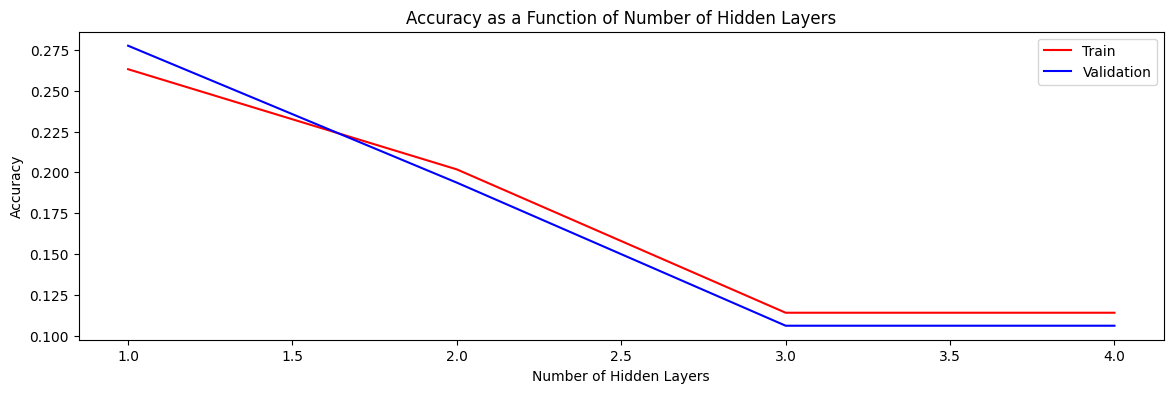

In [32]:
# View the training and validation accuracies as functions of number of hidden layers
plt.figure(figsize = (14, 4))

sns.lineplot(data = performance_df, x = 'Number of Hidden Layers', y = 'Train Accuracy', color = 'red', label = 'Train')
sns.lineplot(data = performance_df, x = 'Number of Hidden Layers', y = 'Validation Accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Number of Hidden Layers');

As we can see in the above diagram, the accuracy of the model seems to decline with the number of hidden layers, keeping the number of neurons in each hidden layer fixed at 2.

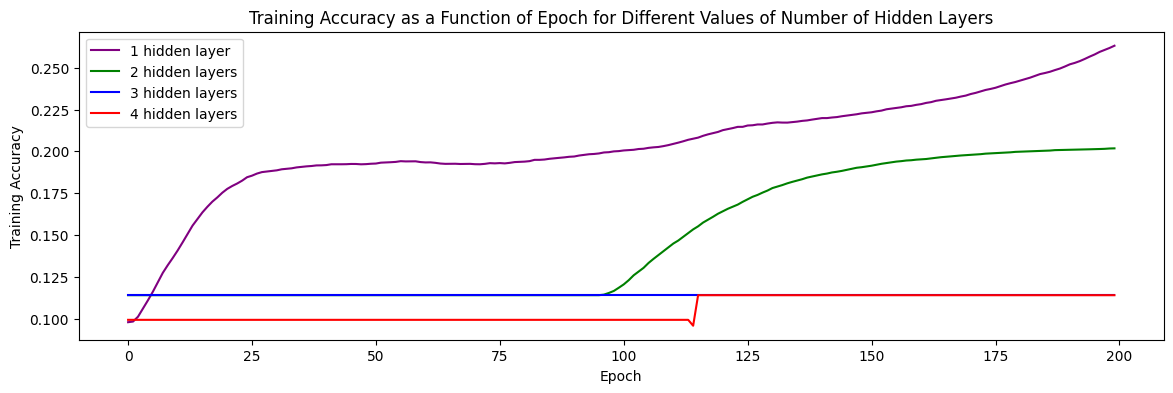

In [33]:
# View the training accuracies as functions of epochs for different values of number of hidden layers
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for n_hid in n_hidden_list:
    indexcount = indexcount + 1
    if n_hid == 1:
        currentlabel = '1 hidden layer'
    else:
        currentlabel = str(n_hid) + ' hidden layers'
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'accuracy',
                 color = colorlist[indexcount],
                 label = currentlabel)

plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy as a Function of Epoch for Different Values of Number of Hidden Layers');

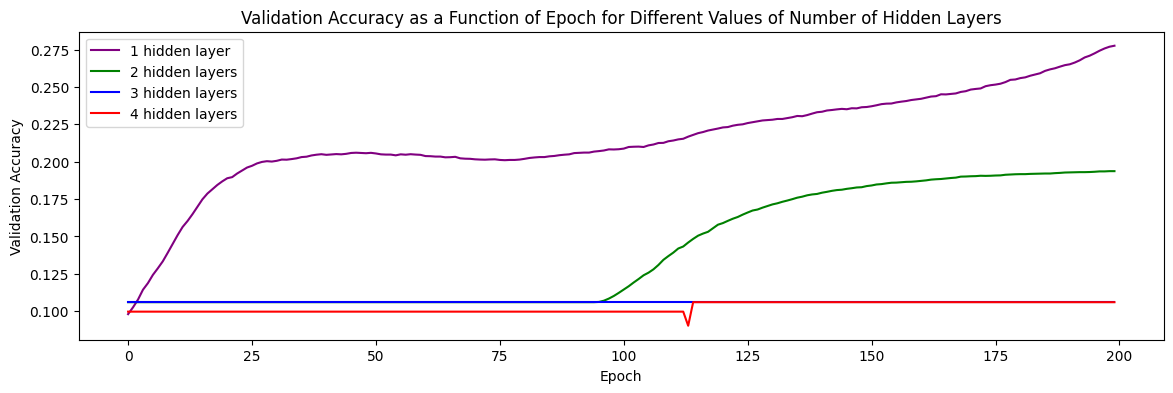

In [34]:
# View the training accuracies as functions of epochs for different values of number of hidden layers
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for n_hid in n_hidden_list:
    indexcount = indexcount + 1
    if n_hid == 1:
        currentlabel = '1 hidden layer'
    else:
        currentlabel = str(n_hid) + ' hidden layers'
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'val_accuracy',
                 color = colorlist[indexcount],
                 label = currentlabel)

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy as a Function of Epoch for Different Values of Number of Hidden Layers');

As we can see in the above diagrams, the rate at which the model's performance increases is less optimal for a larger number of hidden layers.

# Part 7 - Hyperparameter Tuning: Combinations of Hyperparameters
In this section, we will:
- Create a basic neural network model for the data and tune it for combinations of number of neurons and number of hidden layers
  - We will use *GridSearchCV* to execute this
- Check the performance of the model for different values of number of hidden layers

In [35]:
# Define a function to create a neural network model
def create_nn(n_hidden = 1, n_neurons = 2):
    nn = Sequential()
    
    nn.add(Dense(n_neurons,
                 input_shape = (image_vector_size, ),
                 activation = 'sigmoid'))
    
    for n_hid in np.arange(1, n_hidden, 1):
        nn.add(Dense(n_neurons,
                     activation = 'sigmoid'))
    
    nn.add(Dense(num_classes,
                 activation = 'softmax'))
    
    nn.compile(loss = 'categorical_crossentropy',
               metrics = 'accuracy')
    
    return(nn)

In [36]:
# Initialize a basic neural network object using the 'KerasClassifier()' method
# Note: Set the 'build_fn' parameter to 'create_nn'
base_grid_model = KerasClassifier(build_fn = create_nn)

# Define the range of the 'n_hidden' and 'n_neurons' parameters and store it in a parameter grid dictionary
parameters_grid = {'n_hidden': [1, 2], 'n_neurons': [8, 16]}

# Perform a grid search using the 'GridSearchCV()' method to obtain a grid on which to fit the training data
grid = GridSearchCV(estimator = base_grid_model,
                    param_grid = parameters_grid,
                    cv = 2,
                    verbose = 4)

grid_model = grid.fit(X_train, y_train, batch_size = X_train.shape[0], epochs = 200)

# Print the optimal values of 'n_hidden' and 'n_neurons'
best_n_hidden = grid_model.best_params_['n_hidden']
best_n_neurons = grid_model.best_params_['n_neurons']

print('The optimal value of number of hidden layers is', best_n_hidden)
print('The optimal value of number of neurons per hidden layer is', best_n_neurons)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Epoch 1/200
1/1 [==============================] - 1s 785ms/step - loss: 2.3944 - accuracy: 0.0964
Epoch 2/200
1/1 [==============================] - 0s 84ms/step - loss: 2.3525 - accuracy: 0.0988
Epoch 3/200
1/1 [==============================] - 0s 82ms/step - loss: 2.3253 - accuracy: 0.1017
Epoch 4/200
1/1 [==============================] - 0s 73ms/step - loss: 2.3042 - accuracy: 0.1051
Epoch 5/200
1/1 [==============================] - 0s 72ms/step - loss: 2.2866 - accuracy: 0.1106
Epoch 6/200
1/1 [==============================] - 0s 67ms/step - loss: 2.2714 - accuracy: 0.1190
Epoch 7/200
1/1 [==============================] - 0s 70ms/step - loss: 2.2578 - accuracy: 0.1310
Epoch 8/200
1/1 [==============================] - 0s 65ms/step - loss: 2.2454 - accuracy: 0.1419
Epoch 9/200
1/1 [==============================] - 0s 70ms/step - loss: 2.2340 - accuracy: 0.1549
Epoch 10/200
1/1 [==============================] - 0s 67m

1/1 [==============================] - 0s 63ms/step - loss: 1.5836 - accuracy: 0.6847
Epoch 166/200
1/1 [==============================] - 0s 53ms/step - loss: 1.5809 - accuracy: 0.6854
Epoch 167/200
1/1 [==============================] - 0s 47ms/step - loss: 1.5782 - accuracy: 0.6866
Epoch 168/200
1/1 [==============================] - 0s 53ms/step - loss: 1.5755 - accuracy: 0.6869
Epoch 169/200
1/1 [==============================] - 0s 62ms/step - loss: 1.5728 - accuracy: 0.6877
Epoch 170/200
1/1 [==============================] - 0s 53ms/step - loss: 1.5701 - accuracy: 0.6888
Epoch 171/200
1/1 [==============================] - 0s 47ms/step - loss: 1.5675 - accuracy: 0.6897
Epoch 172/200
1/1 [==============================] - 0s 53ms/step - loss: 1.5648 - accuracy: 0.6906
Epoch 173/200
1/1 [==============================] - 0s 62ms/step - loss: 1.5621 - accuracy: 0.6913
Epoch 174/200
1/1 [==============================] - 0s 53ms/step - loss: 1.5595 - accuracy: 0.6925
Epoch 175/200


1/1 [==============================] - 0s 51ms/step - loss: 2.0669 - accuracy: 0.2441
Epoch 46/200
1/1 [==============================] - 0s 71ms/step - loss: 2.0614 - accuracy: 0.2488
Epoch 47/200
1/1 [==============================] - 0s 50ms/step - loss: 2.0559 - accuracy: 0.2536
Epoch 48/200
1/1 [==============================] - 0s 50ms/step - loss: 2.0505 - accuracy: 0.2586
Epoch 49/200
1/1 [==============================] - 0s 50ms/step - loss: 2.0450 - accuracy: 0.2634
Epoch 50/200
1/1 [==============================] - 0s 52ms/step - loss: 2.0397 - accuracy: 0.2685
Epoch 51/200
1/1 [==============================] - 0s 61ms/step - loss: 2.0343 - accuracy: 0.2736
Epoch 52/200
1/1 [==============================] - 0s 59ms/step - loss: 2.0290 - accuracy: 0.2795
Epoch 53/200
1/1 [==============================] - 0s 51ms/step - loss: 2.0238 - accuracy: 0.2851
Epoch 54/200
1/1 [==============================] - 0s 50ms/step - loss: 2.0186 - accuracy: 0.2906
Epoch 55/200
1/1 [=====

1/1 [==============================] - 0s 53ms/step - loss: 1.7214 - accuracy: 0.6328
Epoch 128/200
1/1 [==============================] - 0s 50ms/step - loss: 1.7181 - accuracy: 0.6342
Epoch 129/200
1/1 [==============================] - 0s 50ms/step - loss: 1.7149 - accuracy: 0.6358
Epoch 130/200
1/1 [==============================] - 0s 61ms/step - loss: 1.7116 - accuracy: 0.6373
Epoch 131/200
1/1 [==============================] - 0s 51ms/step - loss: 1.7084 - accuracy: 0.6385
Epoch 132/200
1/1 [==============================] - 0s 58ms/step - loss: 1.7052 - accuracy: 0.6400
Epoch 133/200
1/1 [==============================] - 0s 50ms/step - loss: 1.7020 - accuracy: 0.6414
Epoch 134/200
1/1 [==============================] - 0s 50ms/step - loss: 1.6988 - accuracy: 0.6426
Epoch 135/200
1/1 [==============================] - 0s 50ms/step - loss: 1.6956 - accuracy: 0.6436
Epoch 136/200
1/1 [==============================] - 0s 52ms/step - loss: 1.6925 - accuracy: 0.6448
Epoch 137/200


1/1 [==============================] - 0s 47ms/step - loss: 2.2496 - accuracy: 0.1166
Epoch 8/200
1/1 [==============================] - 0s 53ms/step - loss: 2.2281 - accuracy: 0.1323
Epoch 9/200
1/1 [==============================] - 0s 69ms/step - loss: 2.2085 - accuracy: 0.1527
Epoch 10/200
1/1 [==============================] - 0s 62ms/step - loss: 2.1903 - accuracy: 0.1769
Epoch 11/200
1/1 [==============================] - 0s 53ms/step - loss: 2.1733 - accuracy: 0.2023
Epoch 12/200
1/1 [==============================] - 0s 47ms/step - loss: 2.1573 - accuracy: 0.2256
Epoch 13/200
1/1 [==============================] - 0s 53ms/step - loss: 2.1420 - accuracy: 0.2474
Epoch 14/200
1/1 [==============================] - 0s 53ms/step - loss: 2.1274 - accuracy: 0.2675
Epoch 15/200
1/1 [==============================] - 0s 62ms/step - loss: 2.1134 - accuracy: 0.2855
Epoch 16/200
1/1 [==============================] - 0s 69ms/step - loss: 2.0998 - accuracy: 0.3015
Epoch 17/200
1/1 [=======

1/1 [==============================] - 0s 60ms/step - loss: 1.4521 - accuracy: 0.7577
Epoch 90/200
1/1 [==============================] - 0s 60ms/step - loss: 1.4456 - accuracy: 0.7603
Epoch 91/200
1/1 [==============================] - 0s 68ms/step - loss: 1.4392 - accuracy: 0.7627
Epoch 92/200
1/1 [==============================] - 0s 58ms/step - loss: 1.4329 - accuracy: 0.7650
Epoch 93/200
1/1 [==============================] - 0s 58ms/step - loss: 1.4266 - accuracy: 0.7672
Epoch 94/200
1/1 [==============================] - 0s 59ms/step - loss: 1.4203 - accuracy: 0.7690
Epoch 95/200
1/1 [==============================] - 0s 61ms/step - loss: 1.4141 - accuracy: 0.7709
Epoch 96/200
1/1 [==============================] - 0s 60ms/step - loss: 1.4080 - accuracy: 0.7734
Epoch 97/200
1/1 [==============================] - 0s 69ms/step - loss: 1.4018 - accuracy: 0.7754
Epoch 98/200
1/1 [==============================] - 0s 71ms/step - loss: 1.3958 - accuracy: 0.7775
Epoch 99/200
1/1 [=====

1/1 [==============================] - 0s 69ms/step - loss: 1.0448 - accuracy: 0.8509
Epoch 172/200
1/1 [==============================] - 0s 47ms/step - loss: 1.0410 - accuracy: 0.8523
Epoch 173/200
1/1 [==============================] - 0s 69ms/step - loss: 1.0372 - accuracy: 0.8517
Epoch 174/200
1/1 [==============================] - 0s 47ms/step - loss: 1.0334 - accuracy: 0.8535
Epoch 175/200
1/1 [==============================] - 0s 53ms/step - loss: 1.0297 - accuracy: 0.8524
Epoch 176/200
1/1 [==============================] - 0s 62ms/step - loss: 1.0260 - accuracy: 0.8541
Epoch 177/200
1/1 [==============================] - 0s 53ms/step - loss: 1.0222 - accuracy: 0.8533
Epoch 178/200
1/1 [==============================] - 0s 53ms/step - loss: 1.0186 - accuracy: 0.8550
Epoch 179/200
1/1 [==============================] - 0s 62ms/step - loss: 1.0149 - accuracy: 0.8545
Epoch 180/200
1/1 [==============================] - 0s 53ms/step - loss: 1.0112 - accuracy: 0.8559
Epoch 181/200


1/1 [==============================] - 0s 78ms/step - loss: 1.6558 - accuracy: 0.6324
Epoch 52/200
1/1 [==============================] - 0s 69ms/step - loss: 1.6471 - accuracy: 0.6365
Epoch 53/200
1/1 [==============================] - 0s 79ms/step - loss: 1.6385 - accuracy: 0.6401
Epoch 54/200
1/1 [==============================] - 0s 74ms/step - loss: 1.6299 - accuracy: 0.6436
Epoch 55/200
1/1 [==============================] - 0s 62ms/step - loss: 1.6215 - accuracy: 0.6471
Epoch 56/200
1/1 [==============================] - 0s 68ms/step - loss: 1.6132 - accuracy: 0.6497
Epoch 57/200
1/1 [==============================] - 0s 67ms/step - loss: 1.6050 - accuracy: 0.6523
Epoch 58/200
1/1 [==============================] - 0s 61ms/step - loss: 1.5968 - accuracy: 0.6556
Epoch 59/200
1/1 [==============================] - 0s 61ms/step - loss: 1.5888 - accuracy: 0.6589
Epoch 60/200
1/1 [==============================] - 0s 52ms/step - loss: 1.5808 - accuracy: 0.6622
Epoch 61/200
1/1 [=====

1/1 [==============================] - 0s 53ms/step - loss: 1.1568 - accuracy: 0.7991
Epoch 134/200
1/1 [==============================] - 0s 69ms/step - loss: 1.1524 - accuracy: 0.8006
Epoch 135/200
1/1 [==============================] - 0s 62ms/step - loss: 1.1481 - accuracy: 0.8010
Epoch 136/200
1/1 [==============================] - 0s 69ms/step - loss: 1.1438 - accuracy: 0.8021
Epoch 137/200
1/1 [==============================] - 0s 53ms/step - loss: 1.1395 - accuracy: 0.8029
Epoch 138/200
1/1 [==============================] - 0s 62ms/step - loss: 1.1352 - accuracy: 0.8041
Epoch 139/200
1/1 [==============================] - 0s 53ms/step - loss: 1.1310 - accuracy: 0.8047
Epoch 140/200
1/1 [==============================] - 0s 47ms/step - loss: 1.1267 - accuracy: 0.8063
Epoch 141/200
1/1 [==============================] - 0s 69ms/step - loss: 1.1225 - accuracy: 0.8069
Epoch 142/200
1/1 [==============================] - 0s 53ms/step - loss: 1.1184 - accuracy: 0.8085
Epoch 143/200


1/1 [==============================] - 0s 47ms/step - loss: 2.3065 - accuracy: 0.1019
Epoch 14/200
1/1 [==============================] - 0s 53ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 15/200
1/1 [==============================] - 0s 62ms/step - loss: 2.2988 - accuracy: 0.1019
Epoch 16/200
1/1 [==============================] - 0s 53ms/step - loss: 2.2951 - accuracy: 0.1019
Epoch 17/200
1/1 [==============================] - 0s 47ms/step - loss: 2.2915 - accuracy: 0.1019
Epoch 18/200
1/1 [==============================] - 0s 38ms/step - loss: 2.2880 - accuracy: 0.1019
Epoch 19/200
1/1 [==============================] - 0s 62ms/step - loss: 2.2845 - accuracy: 0.1019
Epoch 20/200
1/1 [==============================] - 0s 53ms/step - loss: 2.2812 - accuracy: 0.1019
Epoch 21/200
1/1 [==============================] - 0s 47ms/step - loss: 2.2779 - accuracy: 0.1019
Epoch 22/200
1/1 [==============================] - 0s 53ms/step - loss: 2.2747 - accuracy: 0.1019
Epoch 23/200
1/1 [=====

1/1 [==============================] - 0s 53ms/step - loss: 2.1023 - accuracy: 0.3370
Epoch 96/200
1/1 [==============================] - 0s 47ms/step - loss: 2.1004 - accuracy: 0.3432
Epoch 97/200
1/1 [==============================] - 0s 53ms/step - loss: 2.0986 - accuracy: 0.3497
Epoch 98/200
1/1 [==============================] - 0s 47ms/step - loss: 2.0967 - accuracy: 0.3552
Epoch 99/200
1/1 [==============================] - 0s 53ms/step - loss: 2.0949 - accuracy: 0.3606
Epoch 100/200
1/1 [==============================] - 0s 62ms/step - loss: 2.0930 - accuracy: 0.3665
Epoch 101/200
1/1 [==============================] - 0s 53ms/step - loss: 2.0912 - accuracy: 0.3714
Epoch 102/200
1/1 [==============================] - 0s 47ms/step - loss: 2.0894 - accuracy: 0.3755
Epoch 103/200
1/1 [==============================] - 0s 53ms/step - loss: 2.0875 - accuracy: 0.3800
Epoch 104/200
1/1 [==============================] - 0s 54ms/step - loss: 2.0857 - accuracy: 0.3838
Epoch 105/200
1/1 

1/1 [==============================] - 0s 50ms/step - loss: 1.9595 - accuracy: 0.4943
Epoch 178/200
1/1 [==============================] - 0s 52ms/step - loss: 1.9578 - accuracy: 0.4938
Epoch 179/200
1/1 [==============================] - 0s 60ms/step - loss: 1.9561 - accuracy: 0.4945
Epoch 180/200
1/1 [==============================] - 0s 59ms/step - loss: 1.9544 - accuracy: 0.4943
Epoch 181/200
1/1 [==============================] - 0s 59ms/step - loss: 1.9527 - accuracy: 0.4954
Epoch 182/200
1/1 [==============================] - 0s 59ms/step - loss: 1.9510 - accuracy: 0.4949
Epoch 183/200
1/1 [==============================] - 0s 50ms/step - loss: 1.9492 - accuracy: 0.4959
Epoch 184/200
1/1 [==============================] - 0s 52ms/step - loss: 1.9475 - accuracy: 0.4960
Epoch 185/200
1/1 [==============================] - 0s 60ms/step - loss: 1.9458 - accuracy: 0.4970
Epoch 186/200
1/1 [==============================] - 0s 61ms/step - loss: 1.9441 - accuracy: 0.4970
Epoch 187/200


Epoch 58/200
1/1 [==============================] - 0s 51ms/step - loss: 2.1491 - accuracy: 0.3559
Epoch 59/200
1/1 [==============================] - 0s 50ms/step - loss: 2.1468 - accuracy: 0.3580
Epoch 60/200
1/1 [==============================] - 0s 58ms/step - loss: 2.1446 - accuracy: 0.3600
Epoch 61/200
1/1 [==============================] - 0s 50ms/step - loss: 2.1424 - accuracy: 0.3622
Epoch 62/200
1/1 [==============================] - 0s 50ms/step - loss: 2.1401 - accuracy: 0.3647
Epoch 63/200
1/1 [==============================] - 0s 51ms/step - loss: 2.1379 - accuracy: 0.3668
Epoch 64/200
1/1 [==============================] - 0s 52ms/step - loss: 2.1357 - accuracy: 0.3683
Epoch 65/200
1/1 [==============================] - 0s 50ms/step - loss: 2.1335 - accuracy: 0.3698
Epoch 66/200
1/1 [==============================] - 0s 50ms/step - loss: 2.1313 - accuracy: 0.3717
Epoch 67/200
1/1 [==============================] - 0s 50ms/step - loss: 2.1291 - accuracy: 0.3734
Epoch 68/2

1/1 [==============================] - 0s 53ms/step - loss: 1.9856 - accuracy: 0.3782
Epoch 141/200
1/1 [==============================] - 0s 53ms/step - loss: 1.9838 - accuracy: 0.3788
Epoch 142/200
1/1 [==============================] - 0s 47ms/step - loss: 1.9820 - accuracy: 0.3787
Epoch 143/200
1/1 [==============================] - 0s 53ms/step - loss: 1.9802 - accuracy: 0.3790
Epoch 144/200
1/1 [==============================] - 0s 62ms/step - loss: 1.9783 - accuracy: 0.3790
Epoch 145/200
1/1 [==============================] - 0s 38ms/step - loss: 1.9765 - accuracy: 0.3787
Epoch 146/200
1/1 [==============================] - 0s 62ms/step - loss: 1.9747 - accuracy: 0.3787
Epoch 147/200
1/1 [==============================] - 0s 53ms/step - loss: 1.9729 - accuracy: 0.3791
Epoch 148/200
1/1 [==============================] - 0s 47ms/step - loss: 1.9711 - accuracy: 0.3792
Epoch 149/200
1/1 [==============================] - 0s 53ms/step - loss: 1.9693 - accuracy: 0.3791
Epoch 150/200


1/1 [==============================] - 0s 47ms/step - loss: 2.2768 - accuracy: 0.1306
Epoch 21/200
1/1 [==============================] - 0s 53ms/step - loss: 2.2708 - accuracy: 0.1378
Epoch 22/200
1/1 [==============================] - 0s 69ms/step - loss: 2.2649 - accuracy: 0.1442
Epoch 23/200
1/1 [==============================] - 0s 62ms/step - loss: 2.2591 - accuracy: 0.1507
Epoch 24/200
1/1 [==============================] - 0s 53ms/step - loss: 2.2534 - accuracy: 0.1567
Epoch 25/200
1/1 [==============================] - 0s 69ms/step - loss: 2.2477 - accuracy: 0.1616
Epoch 26/200
1/1 [==============================] - 0s 62ms/step - loss: 2.2422 - accuracy: 0.1662
Epoch 27/200
1/1 [==============================] - 0s 69ms/step - loss: 2.2367 - accuracy: 0.1697
Epoch 28/200
1/1 [==============================] - 0s 62ms/step - loss: 2.2313 - accuracy: 0.1728
Epoch 29/200
1/1 [==============================] - 0s 53ms/step - loss: 2.2259 - accuracy: 0.1755
Epoch 30/200
1/1 [=====

1/1 [==============================] - 0s 47ms/step - loss: 1.9057 - accuracy: 0.5050
Epoch 103/200
1/1 [==============================] - 0s 53ms/step - loss: 1.9017 - accuracy: 0.5085
Epoch 104/200
1/1 [==============================] - 0s 53ms/step - loss: 1.8977 - accuracy: 0.5123
Epoch 105/200
1/1 [==============================] - 0s 47ms/step - loss: 1.8937 - accuracy: 0.5161
Epoch 106/200
1/1 [==============================] - 0s 69ms/step - loss: 1.8898 - accuracy: 0.5198
Epoch 107/200
1/1 [==============================] - 0s 47ms/step - loss: 1.8858 - accuracy: 0.5236
Epoch 108/200
1/1 [==============================] - 0s 53ms/step - loss: 1.8819 - accuracy: 0.5273
Epoch 109/200
1/1 [==============================] - 0s 53ms/step - loss: 1.8779 - accuracy: 0.5303
Epoch 110/200
1/1 [==============================] - 0s 62ms/step - loss: 1.8740 - accuracy: 0.5337
Epoch 111/200
1/1 [==============================] - 0s 69ms/step - loss: 1.8700 - accuracy: 0.5373
Epoch 112/200


1/1 [==============================] - 0s 62ms/step - loss: 1.5945 - accuracy: 0.6947
Epoch 185/200
1/1 [==============================] - 0s 47ms/step - loss: 1.5908 - accuracy: 0.6961
Epoch 186/200
1/1 [==============================] - 0s 69ms/step - loss: 1.5872 - accuracy: 0.6977
Epoch 187/200
1/1 [==============================] - 0s 47ms/step - loss: 1.5836 - accuracy: 0.6989
Epoch 188/200
1/1 [==============================] - 0s 53ms/step - loss: 1.5800 - accuracy: 0.7005
Epoch 189/200
1/1 [==============================] - 0s 62ms/step - loss: 1.5764 - accuracy: 0.7016
Epoch 190/200
1/1 [==============================] - 0s 53ms/step - loss: 1.5728 - accuracy: 0.7036
Epoch 191/200
1/1 [==============================] - 0s 69ms/step - loss: 1.5692 - accuracy: 0.7047
Epoch 192/200
1/1 [==============================] - 0s 47ms/step - loss: 1.5656 - accuracy: 0.7057
Epoch 193/200
1/1 [==============================] - 0s 53ms/step - loss: 1.5620 - accuracy: 0.7070
Epoch 194/200


1/1 [==============================] - 0s 62ms/step - loss: 2.1159 - accuracy: 0.4629
Epoch 66/200
1/1 [==============================] - 0s 69ms/step - loss: 2.1120 - accuracy: 0.4671
Epoch 67/200
1/1 [==============================] - 0s 62ms/step - loss: 2.1081 - accuracy: 0.4709
Epoch 68/200
1/1 [==============================] - 0s 53ms/step - loss: 2.1042 - accuracy: 0.4739
Epoch 69/200
1/1 [==============================] - 0s 53ms/step - loss: 2.1003 - accuracy: 0.4771
Epoch 70/200
1/1 [==============================] - 0s 62ms/step - loss: 2.0964 - accuracy: 0.4798
Epoch 71/200
1/1 [==============================] - 0s 69ms/step - loss: 2.0926 - accuracy: 0.4827
Epoch 72/200
1/1 [==============================] - 0s 53ms/step - loss: 2.0887 - accuracy: 0.4849
Epoch 73/200
1/1 [==============================] - 0s 47ms/step - loss: 2.0849 - accuracy: 0.4862
Epoch 74/200
1/1 [==============================] - 0s 69ms/step - loss: 2.0810 - accuracy: 0.4885
Epoch 75/200
1/1 [=====

1/1 [==============================] - 0s 53ms/step - loss: 1.8110 - accuracy: 0.6095
Epoch 148/200
1/1 [==============================] - 0s 53ms/step - loss: 1.8073 - accuracy: 0.6119
Epoch 149/200
1/1 [==============================] - 0s 62ms/step - loss: 1.8037 - accuracy: 0.6132
Epoch 150/200
1/1 [==============================] - 0s 53ms/step - loss: 1.8001 - accuracy: 0.6151
Epoch 151/200
1/1 [==============================] - 0s 62ms/step - loss: 1.7964 - accuracy: 0.6164
Epoch 152/200
1/1 [==============================] - 0s 53ms/step - loss: 1.7928 - accuracy: 0.6179
Epoch 153/200
1/1 [==============================] - 0s 53ms/step - loss: 1.7891 - accuracy: 0.6187
Epoch 154/200
1/1 [==============================] - 0s 47ms/step - loss: 1.7855 - accuracy: 0.6211
Epoch 155/200
1/1 [==============================] - 0s 69ms/step - loss: 1.7819 - accuracy: 0.6214
Epoch 156/200
1/1 [==============================] - 0s 47ms/step - loss: 1.7783 - accuracy: 0.6240
Epoch 157/200


1/1 [==============================] - 0s 116ms/step - loss: 1.8577 - accuracy: 0.6258
Epoch 28/200
1/1 [==============================] - 0s 100ms/step - loss: 1.8466 - accuracy: 0.6310
Epoch 29/200
1/1 [==============================] - 0s 85ms/step - loss: 1.8357 - accuracy: 0.6363
Epoch 30/200
1/1 [==============================] - 0s 116ms/step - loss: 1.8249 - accuracy: 0.6415
Epoch 31/200
1/1 [==============================] - 0s 116ms/step - loss: 1.8143 - accuracy: 0.6464
Epoch 32/200
1/1 [==============================] - 0s 100ms/step - loss: 1.8038 - accuracy: 0.6506
Epoch 33/200
1/1 [==============================] - 0s 116ms/step - loss: 1.7935 - accuracy: 0.6546
Epoch 34/200
1/1 [==============================] - 0s 116ms/step - loss: 1.7834 - accuracy: 0.6590
Epoch 35/200
1/1 [==============================] - 0s 100ms/step - loss: 1.7733 - accuracy: 0.6634
Epoch 36/200
1/1 [==============================] - 0s 120ms/step - loss: 1.7634 - accuracy: 0.6673
Epoch 37/200
1

Epoch 109/200
1/1 [==============================] - 0s 100ms/step - loss: 1.2484 - accuracy: 0.7984
Epoch 110/200
1/1 [==============================] - 0s 116ms/step - loss: 1.2433 - accuracy: 0.7990
Epoch 111/200
1/1 [==============================] - 0s 116ms/step - loss: 1.2382 - accuracy: 0.8007
Epoch 112/200
1/1 [==============================] - 0s 85ms/step - loss: 1.2332 - accuracy: 0.8009
Epoch 113/200
1/1 [==============================] - 0s 100ms/step - loss: 1.2282 - accuracy: 0.8023
Epoch 114/200
1/1 [==============================] - 0s 130ms/step - loss: 1.2232 - accuracy: 0.8025
Epoch 115/200
1/1 [==============================] - 0s 111ms/step - loss: 1.2183 - accuracy: 0.8041
Epoch 116/200
1/1 [==============================] - 0s 112ms/step - loss: 1.2134 - accuracy: 0.8044
Epoch 117/200
1/1 [==============================] - 0s 100ms/step - loss: 1.2085 - accuracy: 0.8055
Epoch 118/200
1/1 [==============================] - 0s 100ms/step - loss: 1.2037 - accuracy

1/1 [==============================] - 0s 116ms/step - loss: 0.9240 - accuracy: 0.8539
Epoch 191/200
1/1 [==============================] - 0s 116ms/step - loss: 0.9209 - accuracy: 0.8543
Epoch 192/200
1/1 [==============================] - 0s 116ms/step - loss: 0.9177 - accuracy: 0.8546
Epoch 193/200
1/1 [==============================] - 0s 100ms/step - loss: 0.9146 - accuracy: 0.8551
Epoch 194/200
1/1 [==============================] - 0s 85ms/step - loss: 0.9115 - accuracy: 0.8553
Epoch 195/200
1/1 [==============================] - 0s 85ms/step - loss: 0.9084 - accuracy: 0.8559
Epoch 196/200
1/1 [==============================] - 0s 85ms/step - loss: 0.9053 - accuracy: 0.8561
Epoch 197/200
1/1 [==============================] - 0s 85ms/step - loss: 0.9023 - accuracy: 0.8568
Epoch 198/200
1/1 [==============================] - 0s 85ms/step - loss: 0.8992 - accuracy: 0.8572
Epoch 199/200
1/1 [==============================] - 0s 94ms/step - loss: 0.8962 - accuracy: 0.8576
Epoch 200/

In [37]:
# Create a neural network model with a combination of potentially optimal hyperparameter values and train the model
nn3 = create_nn(n_hidden = best_n_hidden, n_neurons = best_n_neurons)

# Capture the training history of the model
nn3.summary()
print('\n')
nn3_history = nn3.fit(X_train, y_train, batch_size = X_train.shape[0], validation_split = 0.2, epochs = 200)
hist = pd.DataFrame(nn3_history.history)
hist['epoch'] = nn3_history.epoch

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 16)                12560     
                                                                 
 dense_51 (Dense)            (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2.4386 - accuracy: 0.1050 - val_loss: 2.3603 - val_accuracy: 0.1100
Epoch 2/200
1/1 [==============================] - 0s 155ms/step - loss: 2.3580 - accuracy: 0.1055 - val_loss: 2.3117 - val_accuracy: 0.1146
Epoch 3/200
1/1 [==============================] - 0s 172ms/step - loss: 2.3098 - accuracy: 0.1090 - val_loss: 2.2751 - val_accuracy: 0.1269
Epoch 4/200
1/1 [======

1/1 [==============================] - 0s 131ms/step - loss: 1.2761 - accuracy: 0.8091 - val_loss: 1.2489 - val_accuracy: 0.8286
Epoch 112/200
1/1 [==============================] - 0s 138ms/step - loss: 1.2709 - accuracy: 0.8093 - val_loss: 1.2435 - val_accuracy: 0.8308
Epoch 113/200
1/1 [==============================] - 0s 132ms/step - loss: 1.2657 - accuracy: 0.8112 - val_loss: 1.2384 - val_accuracy: 0.8305
Epoch 114/200
1/1 [==============================] - 0s 132ms/step - loss: 1.2606 - accuracy: 0.8117 - val_loss: 1.2331 - val_accuracy: 0.8326
Epoch 115/200
1/1 [==============================] - 0s 116ms/step - loss: 1.2555 - accuracy: 0.8132 - val_loss: 1.2280 - val_accuracy: 0.8334
Epoch 116/200
1/1 [==============================] - 0s 116ms/step - loss: 1.2504 - accuracy: 0.8135 - val_loss: 1.2228 - val_accuracy: 0.8343
Epoch 117/200
1/1 [==============================] - 0s 107ms/step - loss: 1.2453 - accuracy: 0.8150 - val_loss: 1.2178 - val_accuracy: 0.8350
Epoch 118/200

1/1 [==============================] - 0s 116ms/step - loss: 1.0233 - accuracy: 0.8507 - val_loss: 0.9953 - val_accuracy: 0.8655
Epoch 169/200
1/1 [==============================] - 0s 116ms/step - loss: 1.0196 - accuracy: 0.8518 - val_loss: 0.9918 - val_accuracy: 0.8647
Epoch 170/200
1/1 [==============================] - 0s 138ms/step - loss: 1.0158 - accuracy: 0.8514 - val_loss: 0.9879 - val_accuracy: 0.8662
Epoch 171/200
1/1 [==============================] - 0s 116ms/step - loss: 1.0121 - accuracy: 0.8525 - val_loss: 0.9844 - val_accuracy: 0.8655
Epoch 172/200
1/1 [==============================] - 0s 116ms/step - loss: 1.0084 - accuracy: 0.8523 - val_loss: 0.9805 - val_accuracy: 0.8671
Epoch 173/200
1/1 [==============================] - 0s 116ms/step - loss: 1.0048 - accuracy: 0.8531 - val_loss: 0.9771 - val_accuracy: 0.8659
Epoch 174/200
1/1 [==============================] - 0s 116ms/step - loss: 1.0011 - accuracy: 0.8532 - val_loss: 0.9732 - val_accuracy: 0.8675
Epoch 175/200

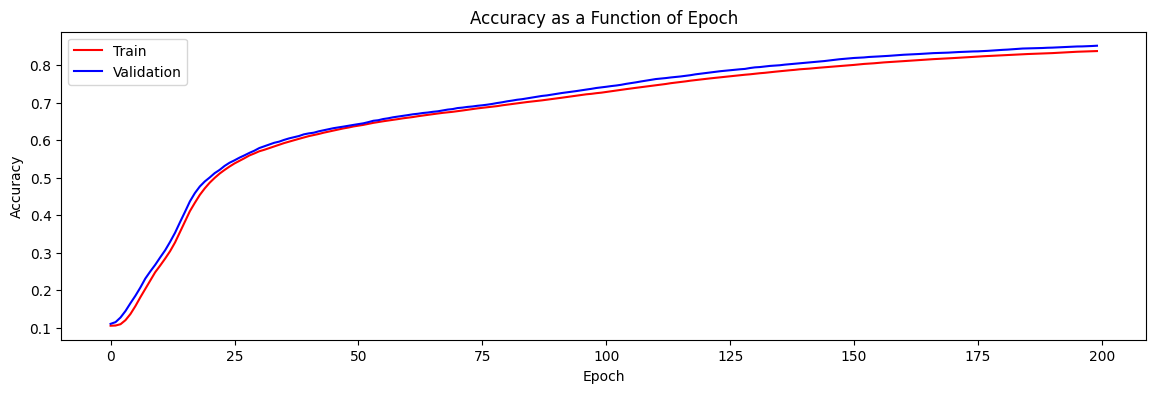

In [38]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Train')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [39]:
# Compute the accuracy of the model on the testing data set
performance_test = nn3.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.9408 - accuracy: 0.8474
The loss value of the model on the test data is 0.9407995343208313
The accuracy of the model on the test data is 0.8474000096321106
